# Lab 2: Comparing Means
## w203 Statistics for Data Science Section 3 Wed 6:30PM
### Team Significant Effect 3: Ben Becerra, Haerang Lee, and Nobu Yamaguchi

In [1]:
# If required package not already installed, install them
required_pkg <- c("ggplot2", "dplyr", "effsize", "lsr", "survey")
install_pkg <- required_pkg[!(required_pkg %in% installed.packages())]

if (length(install_pkg) > 0) {
    install.packages(install_pkg, repos = "http://cran.us.r-project.org", dependencies = TRUE)
}


In [2]:
# Open each library required 
lapply(required_pkg, 
       library, 
       character.only=TRUE, 
       warn.conflicts = FALSE,
       quietly = TRUE, 
       verbose = FALSE)

[[1]]
[1] "ggplot2"   "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
[1] "dplyr"     "ggplot2"   "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[3]]
 [1] "effsize"   "dplyr"     "ggplot2"   "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "lsr"       "effsize"   "dplyr"     "ggplot2"   "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[5]]
 [1] "survey"    "survival"  "Matrix"    "grid"      "lsr"       "effsize"  
 [7] "dplyr"     "ggplot2"   "stats"     "graphics"  "grDevices" "utils"    
[13] "datasets"  "methods"   "base"

In [3]:
A = read.csv("anes_pilot_2018.csv")

## Question 1: Do US voters have more respect for the police or for journalists?

###  A. Introduction
US voters are defined as those that were currently registered to vote, either at current address or different address. This is more likely to capture potential voters. Actual voters may alternatively (discuss with group) be considered as those that mentioned they voted in presidential election 2016, although this could be subject to recall or social desirability biases. 
Respect was operationalized as a rating score from 0 to 100, 100 highest for both police and for journalists. Participants were not directly asked if they "respected" but rather to just to "rate." This could be vague in that some participants may interpret this as how effective, rather than how much they respect police or journalists.


### B. EDA

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -7.00   21.00   52.00   52.26   82.00  100.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   47.00   70.00   64.68   90.00  100.00 


   1    2 
1911  110 

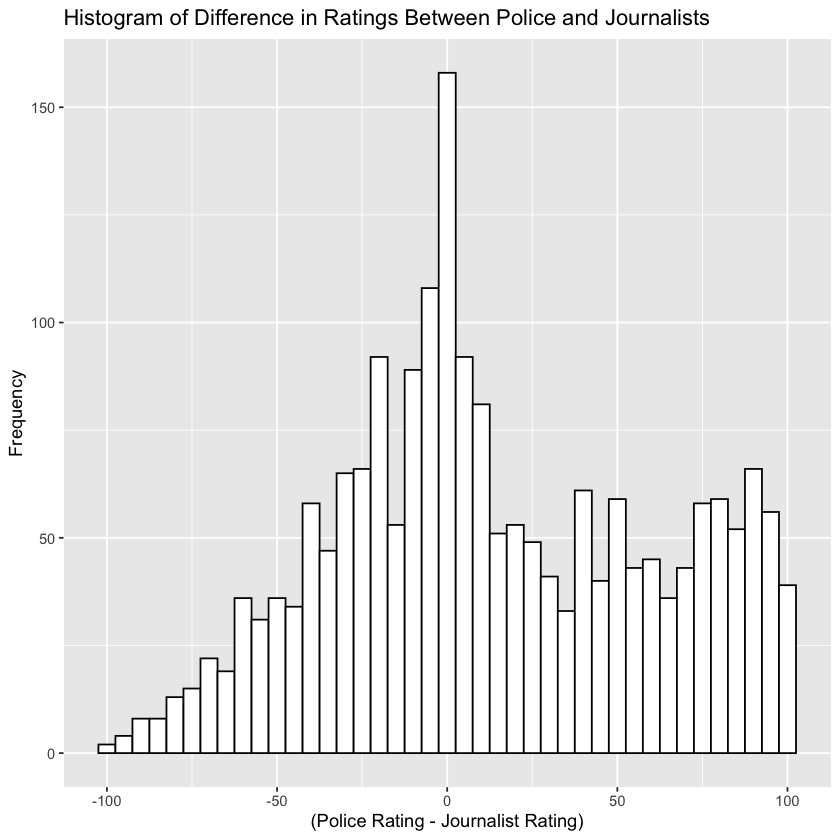

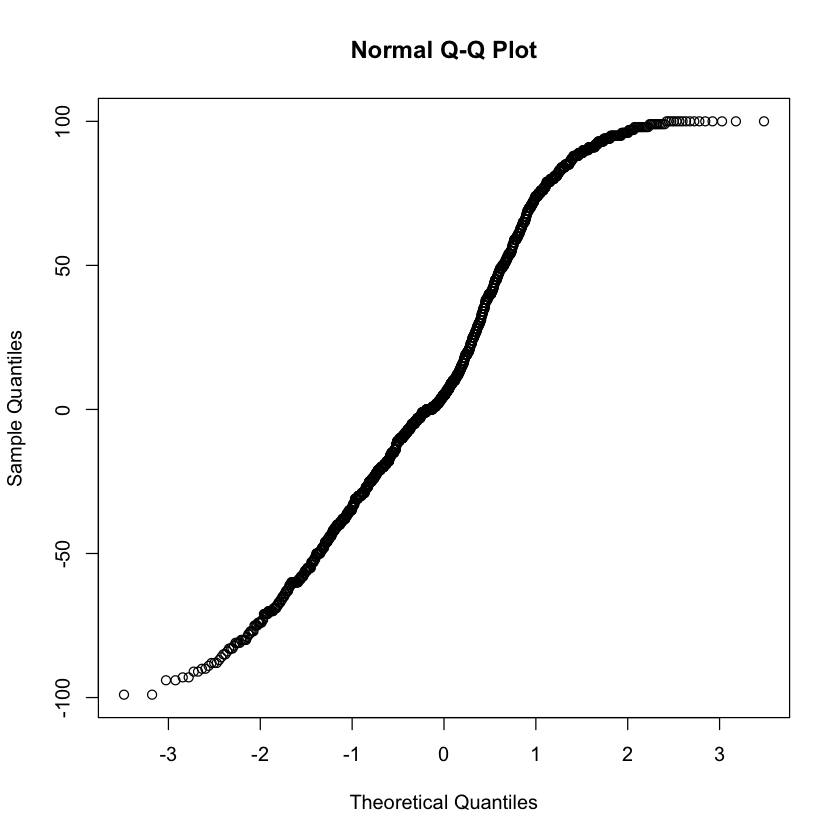

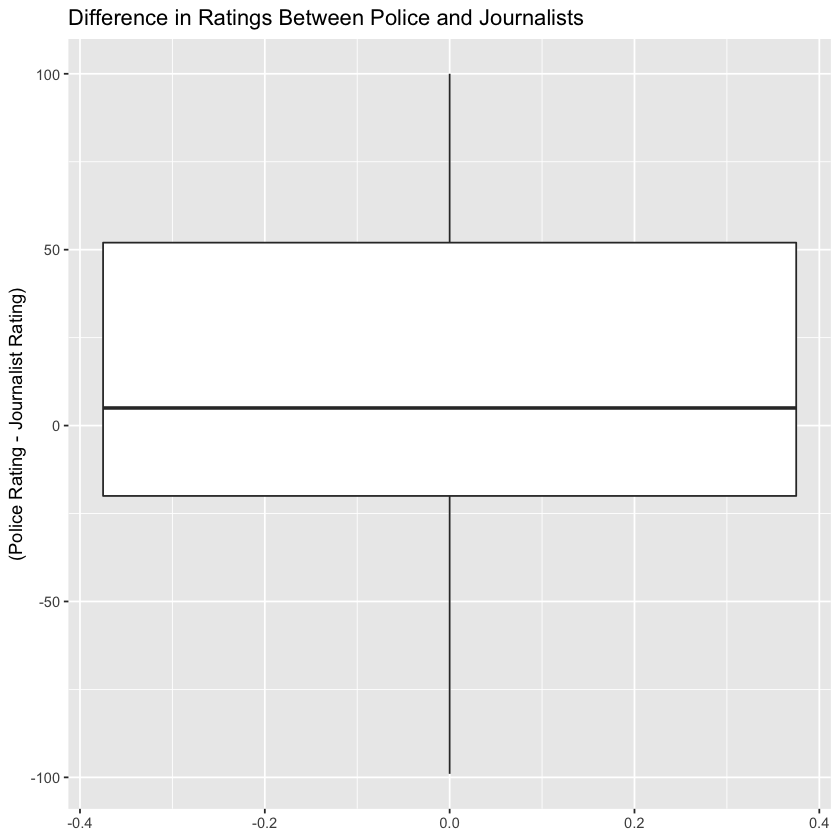

In [4]:
summary(A$ftjournal)
summary(A$ftpolice)
A$diff<- A$ftpolice-A$ftjournal
#ftjournal has missing values. Remove observations with missing data. ONLY include "voters"
cond <-A$ftjournal>-7 & (A$reg==1 | A$reg==2) #subset conditions
q1<-subset(A, cond)
table(q1$reg)

#Histogram and Normal Probability Plot of difference between ftpolice and ftjournal
ggplot(q1, aes(x=diff)) + xlab("(Police Rating - Journalist Rating)") +
    ylab("Frequency") +
    ggtitle("Histogram of Difference in Ratings Between Police and Journalists")+
    geom_histogram(color="black", fill="white",position="dodge",
                binwidth=5)

qqnorm(q1$diff) 
ggplot(q1, aes(y=diff)) + 
ylab("(Police Rating - Journalist Rating)") +
ggtitle("Difference in Ratings Between Police and Journalists")+
  geom_boxplot()

#not too non-normal... no noticable outliers from boxplot...

### C. Testing Method: Paired-samples t-test
#### Hypotheses
$ H_0:\mu_d=0 $ 

$ H_a:\mu_d\neq0 $

#### Assumptions for the t-test
Since two questions asking about respect for police (ftpolice) and respect for journalists (ftjournal) are asked to every person, the data is paired. ftpolice and ftjournal are both on a scale from 0 to 100, and are therefore quantitative data. 

1. Since there are more than 30 paired observations, we will invoke the central limit theorem and assume the sampling distribution is approximately normal.  
2. We are assuming each survey participant is independent of each other. 

Therefore, we will use the paired-samples t-test to evaluate the difference in mean rating score between police and journalists. Since we do not have any particularly strong assumption regarding the direction of this test, we will use a two-tailed test with 0.05 significance level.

#### D. Test Results

In [5]:
t.test(q1$ftpolice, q1$ftjournal, paired=T)

#survey-weighted analysis
# library(survey)

#A complex survey can have clusters, strata, and weights. ANES only has a weight
d_design <- svydesign(id=~1, weights=~weight, data=A)  #id is for clusters, but 1 means none

#using a subset flag variable (cond==TRUE), since you are not supposed to delete rows, only flag them!                    
svyttest(diff~0, design = d_design,subset=(cond)) 


	Paired t-test

data:  q1$ftpolice and q1$ftjournal
t = 12.859, df = 2020, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 11.41273 15.52047
sample estimates:
mean of the differences 
                13.4666 



	Design-based one-sample t-test

data:  diff ~ 0
t = 11.072, df = 2498, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  9.943763 14.223878
sample estimates:
    mean 
12.08382 


#### (1) The Statistical Significance
Conclude that there is a significant difference in the average rating that U.S. voters have for police vs. journalists (p<0.05). 
#### (2) The Practical Significance
On a subjective scale from 0 to 100 (100 is highest rating, "most positive"), U.S. voters rated police 13.47 points higher than journalists, on average. Although this is not technically respect, this is how the variable was operationalized. Future surveys can specifically ask about respect with regards to police and journalists.



### Extra credit! 
#### (1) The Statistical Significance
Conclude that there is a significant difference in the average rating that U.S. voters have for police vs. journalists based on survey-weighted analysis (p<0.05). 
#### (2) The Practical Significance
On a subjective scale from 0 to 100 (100 is highest rating, "most positive"), U.S. voters rated police 12.08 points higher than journalists, on average. Although this is not technically respect, this is how the variable was operationalized. Future surveys can specifically ask about respect with regards to police and journalists.


In [6]:
A = read.csv("anes_pilot_2018.csv")

## Question 2: Are Republican voters older or younger than Democratic voters?

### A. Introduction

For this question, we are interested in the voters' age. So, we need to choose one specific time to calculate voters' age. Since ANES 2018 provides data about voting and public opinion in the 2018 election as of December 2018, we chose the variables related to the 2018 election (not the 2016 election) to define "democratic voters" and "republican voters". ANES is a time series survey and we believe data as of Dec 2018 is the most relavant results to judge both voters' age and whether the participants are republican voters or democrat voters.

We define the democratic voters and republican voters as follows.
>**```Democratic voters```** - who voted for Democrats for all the elections in 2018 among the people who registered

>**```Republican voters```** - who voted for Republicans for all the elections in 2018 among the people who registered

*If someone didn't vote for some of the elections, we judge from the remaining elections. e.g. If participant A voted for Democrats for House and Senate and didn't vote for Governor, we regard partcipant A as a "Democratic voter".*

**Gaps**

There are other variables which show Republican supporters and Democrat supporters such as ```PARTY ID```, which shows whether participants usually think of themselves as a Democrat, a Republican, an independent, or what. Also, some of the participants change supporting party after the 2016 election and may change in 2020. However, we need to choose one specific point to calculate the age of the participants. Also, this question asks "voter"'s age, so we should use the variables which represent the real "voter". Because of this assumption, this analysis capture the age of voters only in 2018.

### B. EDA
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

In [7]:
# For reg, "Are you registered to vote, or not?"

# 1: Yes, registered to vote at my current address
# 2: Yes, registered to vote at a different address
# 3: No, not registered
# -7: Missing 


table(case_when(A$reg %in% c(1, 2) ~ "Registered",
                A$reg ==3 ~ "Not Registered",
                TRUE ~ "Unknown")
      )

summary(A$reg)


Not Registered     Registered        Unknown 
           476           2023              1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -7.000   1.000   1.000   1.422   1.000   3.000 

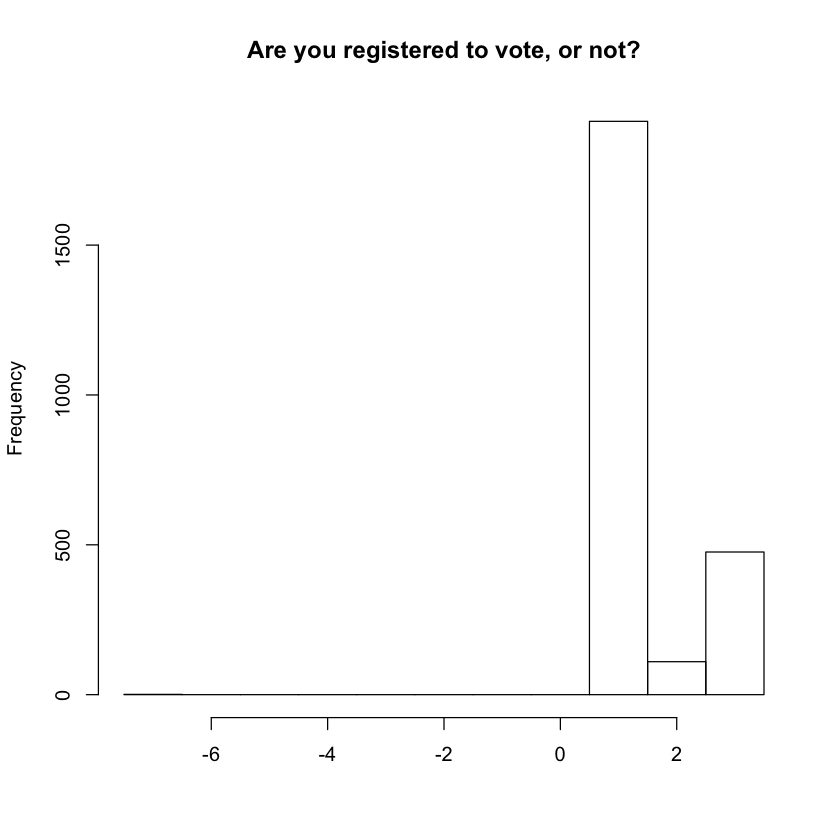

In [8]:
hist(A$reg, breaks=seq(-7.5, 3.5), 
     main="Are you registered to vote, or not?", xlab=NULL)

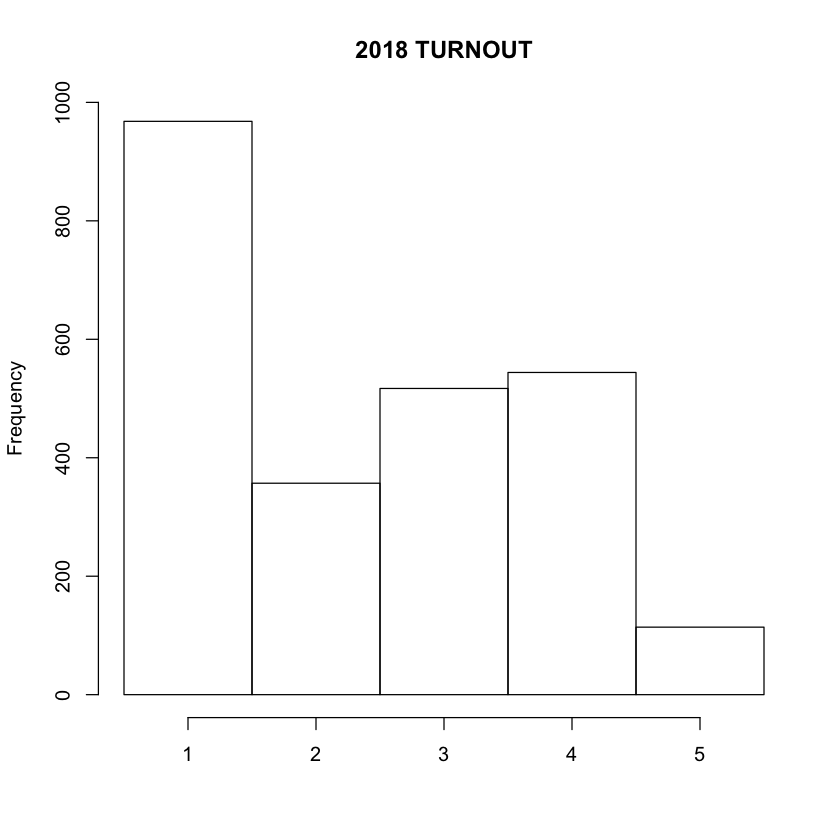

In [9]:
# check "turnout18", 
#In the election held on November 6, did you definitely vote in person on election day, 
#vote in person before Nov 6, vote by mail, did you definitely not vote, or are you not completely sure 
#whether you voted in that election?
#__ Definitely voted in person on Nov 6 [1]
#__ Definitely voted in person, before Nov 6 [2] 
#__ Definitely voted by mail [3] 
#__ Definitely did not vote [4] 
#__ Not completely sure [5]
hist(A$turnout18, breaks=seq(0.5,5.5),
    main='2018 TURNOUT', xlab=NULL)

In [10]:
# we chose the participants who voted for the 2018 election (A$turnout18 < 4) or (A$turnout18 == 5 & A$turnout18ns == 1),
# but we eliminated the participants who didn't choose 'voted' for any of the elections.
# !(A$house18t != 1 & A$senate18t != 1 & A$gov18t != 1)
# Also, we only chose the participants who registered. (A$reg in (1, 2))
new_master = subset(A, ((turnout18 < 4) | #
                    (turnout18 == 5 & turnout18ns == 1))
                    & (reg %in% c(1, 2)) & 
                    !(house18t != 1 & senate18t != 1 & gov18t != 1))
#new.master.data = A[((A$turnout18 < 4) | (A$turnout18 == 5 & A$turnout18ns == 1)) & ((A$reg < 3)& (A$reg >0)) & !(A$house18t != 1 & A$senate18t != 1 & A$gov18t != 1),]

In [11]:
nrow(new_master)

[1] 1809

In [12]:
head(new_master, 10)

,version,caseid,weight,weight_spss,form,follow,addtime,reg,whenreg,howreg,...,rand_emp,rand_climate,rand_rural,rand_pk,rand_pid,starttime,endtime,duration,optintimestamp,completes
1,ANES 2018 Pilot Study main version 20190129,1,1.2555080,0.7286969,1,4,2,1,4,-1,...,1,2,2,1,1,12/10/2018 18:34:11,12/10/2018 20:00:03,5152,10/15/15,46
5,ANES 2018 Pilot Study main version 20190129,5,1.6348200,0.9488495,2,1,3,1,4,-1,...,2,1,2,1,2,12/10/2018 18:28:14,12/10/2018 18:43:23,909,11/11/15,33
6,ANES 2018 Pilot Study main version 20190129,6,1.8184054,1.0554025,1,3,2,2,2,2,...,1,2,1,1,2,12/10/2018 23:58:17,12/11/2018 5:10:57,18760,5/9/15,185
7,ANES 2018 Pilot Study main version 20190129,7,0.4262780,0.2474117,1,1,3,1,4,-1,...,1,1,2,1,2,12/10/2018 19:36:12,12/10/2018 19:50:46,874,,159
8,ANES 2018 Pilot Study main version 20190129,8,0.7808041,0.4531787,1,1,3,1,4,-1,...,2,1,1,0,2,12/10/2018 19:24:55,12/10/2018 22:07:21,9746,4/24/18,50
10,ANES 2018 Pilot Study main version 20190129,10,1.0464271,0.6073463,1,2,2,1,4,-1,...,1,1,2,1,1,12/10/2018 18:46:53,12/10/2018 19:52:57,3964,8/3/16,48
11,ANES 2018 Pilot Study main version 20190129,12,0.5275068,0.3061650,2,1,3,1,4,-1,...,1,2,2,0,1,12/10/2018 18:21:18,12/12/2018 2:34:37,115999,,209
12,ANES 2018 Pilot Study main version 20190129,13,0.6062125,0.3518458,2,1,3,1,4,-1,...,2,1,1,1,1,12/10/2018 17:23:14,12/10/2018 17:52:23,1749,7/21/09,167
14,ANES 2018 Pilot Study main version 20190129,15,0.6239728,0.3621538,1,1,3,1,4,-1,...,1,2,1,0,1,12/6/2018 0:41:25,12/6/2018 5:50:27,18542,,103
16,ANES 2018 Pilot Study main version 20190129,17,1.2480851,0.7243886,1,1,3,1,4,-1,...,1,1,2,1,1,12/10/2018 18:34:22,12/10/2018 18:59:00,1478,10/29/18,9


In [13]:
# calculate age as of Nov 6, 2018 (the election day)
# Since we only know the birth year, we assume the birth day is July 1st.

birth_date <- as.Date(paste(new_master$birthyr, "07", "01"),format="%Y %m %d")
#print(birth.date)

wk_age <- c() 
for (i in seq(1:length(birth_date))) {

    wk_age[i] <- length(seq(as.Date(paste(new_master$birthyr[i], "07", "01"),format="%Y %m %d"),
                            as.Date("2018/11/06"),by="year"))-1
#    print(wk_age[i])
}
# add new column "age" to dataframe
new_master$age <- wk_age

In [14]:
head(new_master, 10)

,version,caseid,weight,weight_spss,form,follow,addtime,reg,whenreg,howreg,...,rand_climate,rand_rural,rand_pk,rand_pid,starttime,endtime,duration,optintimestamp,completes,age
1,ANES 2018 Pilot Study main version 20190129,1,1.2555080,0.7286969,1,4,2,1,4,-1,...,2,2,1,1,12/10/2018 18:34:11,12/10/2018 20:00:03,5152,10/15/15,46,32
5,ANES 2018 Pilot Study main version 20190129,5,1.6348200,0.9488495,2,1,3,1,4,-1,...,1,2,1,2,12/10/2018 18:28:14,12/10/2018 18:43:23,909,11/11/15,33,29
6,ANES 2018 Pilot Study main version 20190129,6,1.8184054,1.0554025,1,3,2,2,2,2,...,2,1,1,2,12/10/2018 23:58:17,12/11/2018 5:10:57,18760,5/9/15,185,26
7,ANES 2018 Pilot Study main version 20190129,7,0.4262780,0.2474117,1,1,3,1,4,-1,...,1,2,1,2,12/10/2018 19:36:12,12/10/2018 19:50:46,874,,159,58
8,ANES 2018 Pilot Study main version 20190129,8,0.7808041,0.4531787,1,1,3,1,4,-1,...,1,1,0,2,12/10/2018 19:24:55,12/10/2018 22:07:21,9746,4/24/18,50,56
10,ANES 2018 Pilot Study main version 20190129,10,1.0464271,0.6073463,1,2,2,1,4,-1,...,1,2,1,1,12/10/2018 18:46:53,12/10/2018 19:52:57,3964,8/3/16,48,61
11,ANES 2018 Pilot Study main version 20190129,12,0.5275068,0.3061650,2,1,3,1,4,-1,...,2,2,0,1,12/10/2018 18:21:18,12/12/2018 2:34:37,115999,,209,50
12,ANES 2018 Pilot Study main version 20190129,13,0.6062125,0.3518458,2,1,3,1,4,-1,...,1,1,1,1,12/10/2018 17:23:14,12/10/2018 17:52:23,1749,7/21/09,167,31
14,ANES 2018 Pilot Study main version 20190129,15,0.6239728,0.3621538,1,1,3,1,4,-1,...,2,1,0,1,12/6/2018 0:41:25,12/6/2018 5:50:27,18542,,103,66
16,ANES 2018 Pilot Study main version 20190129,17,1.2480851,0.7243886,1,1,3,1,4,-1,...,1,2,1,1,12/10/2018 18:34:22,12/10/2018 18:59:00,1478,10/29/18,9,38


In [15]:
# check if we have the same number of rows
nrow(new_master)

[1] 1809

In [16]:
# check the important columns if there are any missing values.
summary(new_master$house18p) # -1 means "inapplicable, legitimate skip"
summary(new_master$senate18p) # -1 means "inapplicable, legitimate skip"
summary(new_master$gov18p) # -1 means "inapplicable, legitimate skip", -7 means "No answer"
summary(new_master$age) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.000   1.000   1.000   1.358   2.000   3.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.0000 -1.0000  1.0000  0.7606  2.0000  4.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-7.0000  1.0000  1.0000  0.9337  2.0000  3.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   42.00   56.00   54.03   65.00   91.00 

In terms of -1 and -7, we treat them as "no answer". 

In [17]:
# we chose democractic voters from the dataframe.
# Those who did not vote for Republicans or Independent in any elections in 2018.
demo_voters <- subset(new_master, !(house18p %in% c(2,3))
                     & !(senate18p %in% c(2,3,4))
                     & !(gov18p %in% c(2,3)))
#demo_voters <- new_master[(new_master$house18p != 2 & new_master$house18p != 3) & (new_master$senate18p != 2 & new_master$senate18p != 3 & new_master$senate18p != 4) & (new_master$gov18p != 2 & new_master$gov18p != 3),]

In [18]:
nrow(demo_voters)

[1] 939

In [19]:
# Also, we chose republican voters from the dataframe
# Those who did not vote for Democrats or Independent in any elections in 2018.
rep_voters <- subset(new_master, !(house18p %in% c(1,3))
                     & !(senate18p %in% c(1,3,4))
                     & !(gov18p %in% c(1,3)))
#rep_voters <- new.master.data[(new.master.data$house18p != 1 & new.master.data$house18p != 3) & (new.master.data$senate18p != 1 & new.master.data$senate18p != 3 & new.master.data$senate18p != 4) & (new.master.data$gov18p != 1 & new.master.data$gov18p != 3),]

In [20]:
nrow(rep_voters)

[1] 672

In [21]:
print('summary information of democratic voters age')
summary(demo_voters$age)
print('var')
var(demo_voters$age)
print('sd')
sd(demo_voters$age)

[1] "summary information of democratic voters age"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   39.00   55.00   52.45   64.00   91.00 

[1] "var"


[1] 263.6717

[1] "sd"


[1] 16.23797

We don't see any outliers in the dataset because the minimum age is 18 and the max age is 91.

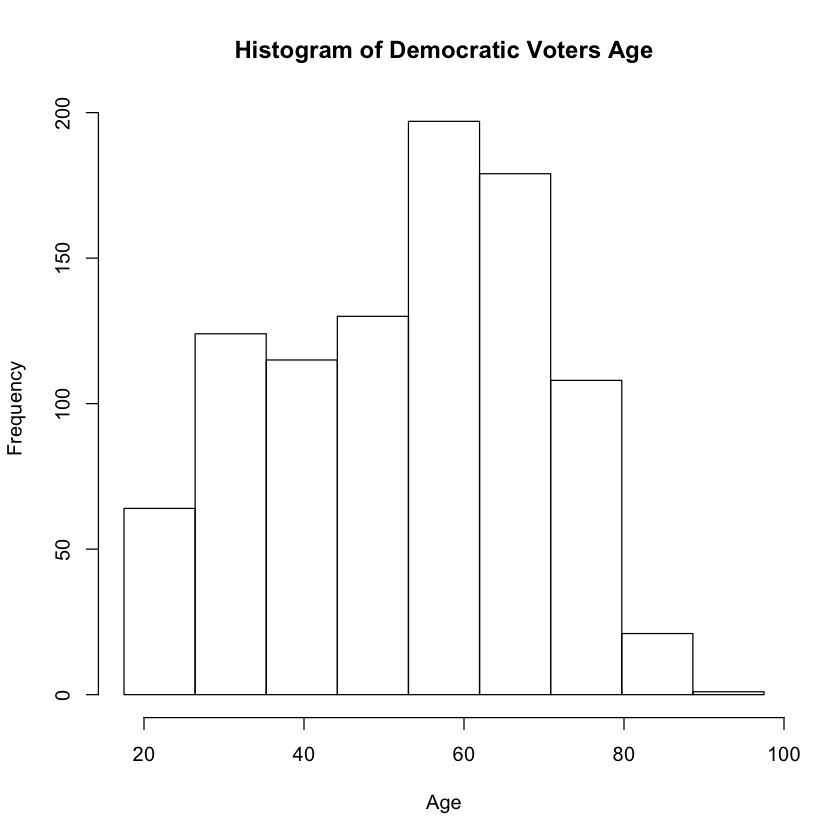

In [22]:
hist(demo_voters$age, breaks=seq(17.5, 97.5, l=10),
    main='Histogram of Democratic Voters Age', xlab="Age")

In [23]:
summary(rep_voters$age)
print('var')
var(rep_voters$age)
print('sd')
sd(rep_voters$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   48.00   59.00   57.09   68.00   90.00 

[1] "var"


[1] 235.5365

[1] "sd"


[1] 15.3472

We don't see any outliers in the dataset because the minimum age is 18 and the max age is 90.

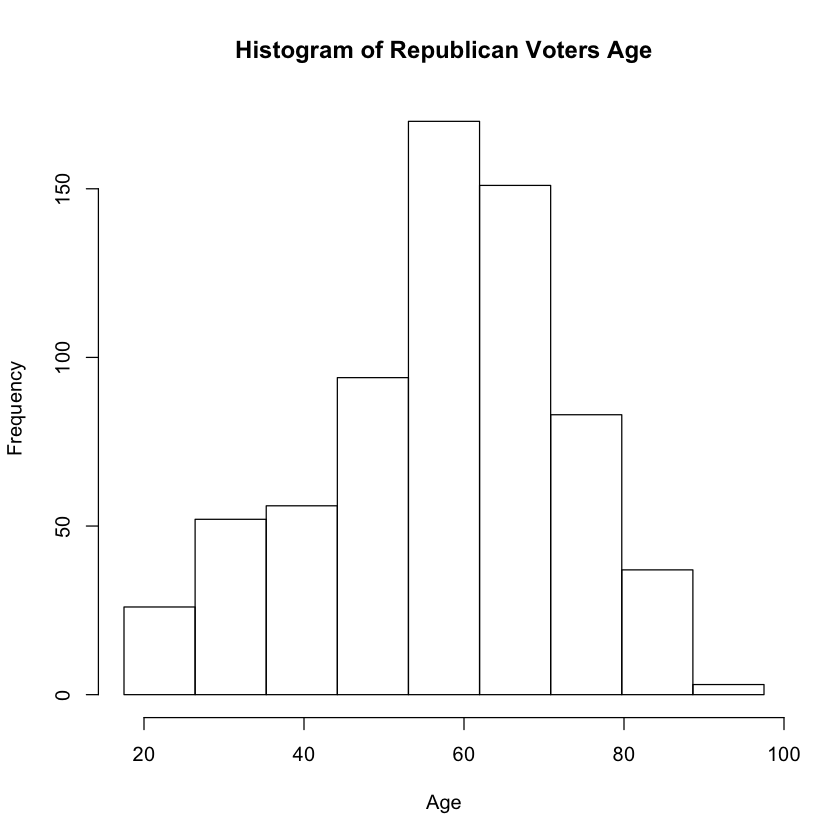

In [24]:

hist(rep_voters$age, breaks=seq(17.5, 97.5, l=10),
    main='Histogram of Republican Voters Age', xlab="Age")

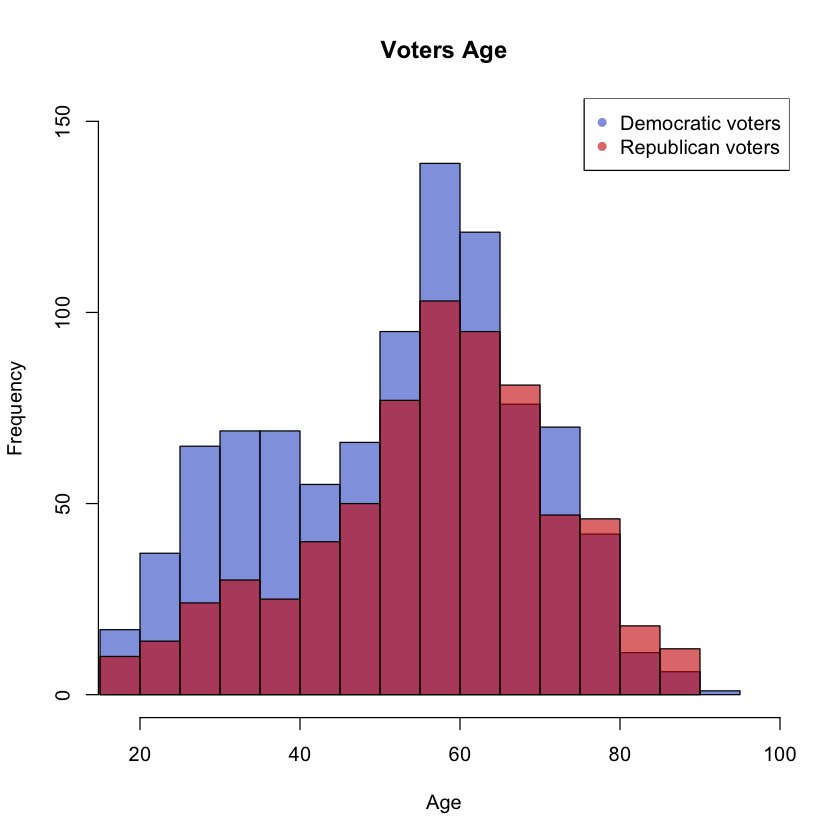

In [25]:
hist(demo_voters$age,col="#3a5fcd99",xlim=c(18,98), ylim=c(0,150), main='Voters Age', xlab="Age")
hist(rep_voters$age, col="#cd000099", add=T)
legend("topright", legend=c("Democratic voters", "Republican voters"), col=c("#3a5fcd99", "#cd000099"), pch=16)
#box()

When comparing the distributions of two groups, it looks similar. Also, the variances of the two groups are close. However, we cannot say how statistically the variances are close. 
Therefore, we check whether the variance of two samples are equal or not by using ```var.test```function. The null hypothesis is that two variances are equal. According to the variance test, p-value is 0.1168 > 0.05. Therefore, we failed to reject the null hypothesis. From this result, we use the unpaired t-test using the option ```var.equal = TRUE```.

In [26]:
var.test(rep_voters$age,demo_voters$age)


	F test to compare two variances

data:  rep_voters$age and demo_voters$age
F = 0.89329, num df = 671, denom df = 938, p-value = 0.1168
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7770417 1.0286402
sample estimates:
ratio of variances 
         0.8932947 


### C. Testing Method

The null hypothesis is the age of democrat voters is equal to the age of republican voters.

$H_0$: $\mu(\text{age of republican voters}) = \mu(\text{age of democrats voters})$

$H_A$: $\mu(\text{age of republican voters}) \ne \mu(\text{age of democrats voters})$

Since two samples are different distribution and values are parametric, we choose unpaired t-test (Two-Sample T-Test).

**Two-Sample T-Test Assumptions**

1. The data are continuous: Yes, age is continuous.
2. The data followed the normal distribution: Yes, although not perfectly.
3. The two samples are independent. There is no relationship between the individuals in one sample as compared to the other: Yes.
4. Both samples are simple random samples from their respective populations. Each individual in the population has an equal probability of being selected in the sample: The survey takes a number of measures to make the survey as representative as possible given the design of the study, but those will be overlooked for now.


### D. Test Results

In [27]:
t.test(rep_voters$age,demo_voters$age,var.equal = TRUE, paired = FALSE, alternative = "two.sided")


	Two Sample t-test

data:  rep_voters$age and demo_voters$age
t = 5.7856, df = 1609, p-value = 8.666e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.067004 6.213176
sample estimates:
mean of x mean of y 
 57.08631  52.44622 


**(1) The statistical significance**

The mean age of republican voters is 57.09 whereas the mean age of democrat voters is 52.45, which is 4.64 lower than the mean of republican voters. Based on the two sample t-test, p-value = 6.398e-09 < .01. We can reject the null hypothesis that the mean age of democrat voters is equal to the mean age of republican voterssay the difference is statistically significant.

To check the difference if we used ```var.queal = FALSE```, we run the following t-test. The p-value is 6.398e-09 < 0.01. Therefore, it doesn't affect our analysis.

In [28]:
t.test(rep_voters$age,demo_voters$age,var.equal = F, paired = FALSE)


	Welch Two Sample t-test

data:  rep_voters$age and demo_voters$age
t = 5.8399, df = 1491.8, p-value = 6.398e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.081547 6.198634
sample estimates:
mean of x mean of y 
 57.08631  52.44622 


**(2) The Practical significance**

We also calculated cohen's d. The cohen's D we got is 0.29, which is considered small, but not meaningless.

Therefore, our conclusion is that Republican voters are older than Democratic voters by an average of 4.64 years in the 2018 election although the practical significance is relatively small. Organizations who market to Republicans or Democratic may want to consider this difference. 

In [29]:
cohen.d(rep_voters$age,demo_voters$age)


Cohen's d

d estimate: 0.2923339 (small)
95 percent confidence interval:
    lower     upper 
0.1927132 0.3919546 

## Question 3: Do a majority of independent voters believe that the federal investigations of Russian election interference are baseless?

###  A. Introduction
We are interested in this question because we want to find out those who are able to vote in the next election cycle have a stance on the Investigation into Russian Interference in the 2016 Presidential Election, otherwise known as the Mueller report. 

#### independent voters

We're interested in independent voters, who vote for candidates based on issues rather than political parties. These voters do not identify themselves with a political party, and if they do, it may be short-lived, as they may vote for candidates from another party in the next election.

#### Voter

A voter will be defined as somebody who can or is likely to vote for the upcoming elections. To operationalize this variable, we will determine whether they have already registered to vote or expressed intension to vote. Being able to trust the respondent's declared registration status or intention may be a limit of the survey, and it's possible that in real life, the survey respondent with every intent to vote will end up not voting. But it's the best we can do. 

* `reg` (“Are you registered to vote?”) 
    * If the respondent said yes (1, 2), we count them as a voter. 
    * If the respondent said no (3), we look at their intention to vote, such as `percent20` > 50 (more likely than not to vote) 



#### Independent voter

The operational definition of an "independent" voter would be those who:

* Self-identify as independent
* OR if not self-identified as independent, then we consider "independent" those who have a history of voting for candidates from different parties.

#### Belief that the investigation is baseless

The conceptual definition of such a belief is thinking that the investigation is an unfounded accusation, possibly motivated by political motives or so-called "fake news". 

The survey asks two direct questions related to the investigation and we can leverage `russia16` and `coord16`. While a belief may have many levels to it, the survey only asks the respondents to choose between two choices. 


#### Gaps in Operationalization
It is important to recognize that the operational variables may not fully capture the conceptual variable that they aim to measure. For instance, if as a result of various events, a voter changes their mind and becomes detached from the party they used to support or start supporting a new party, the variables here will not capture that. 
In addition, the group of voters likely to be independent are targeted by various political campaigns, so they may hold vastly different emotions from what this survey was designed to document.

One person's opinion is not measurable and is quite flexible, so there's only so much that a survey can capture. For example, the survey asked some questions as a yes or no without allowing for varying degrees of opinion. 

### B. EDA

In [30]:
# For reg, "Are you registered to vote, or not?"

# 1: Yes, registered to vote at my current address
# 2: Yes, registered to vote at a different address
# 3: No, not registered
# -7: Missing 

table(case_when(A$reg %in% c(1, 2) ~ "Registered",
                A$reg ==3 ~ "Not Registered",
                TRUE ~ "Unknown")
      )


Not Registered     Registered        Unknown 
           476           2023              1 

In [31]:
# Create a new variable called voter_var
# For the two "yes" responses to reg, mark as 1, meaning that this is a voter 

A$voter_var[ A$reg %in% c(1, 2)] <- 1 
A$voter_var[!A$reg %in% c(1, 2)] <- 0

In [32]:
table(ifelse(A$voter_var==1, "voter", "non-voter"), 
      case_when(A$reg %in% c(1, 2) ~ "Registered",
                A$reg ==3 ~ "Not Registered",
                TRUE ~ "Unknown"
               )
      )

           
            Not Registered Registered Unknown
  non-voter            476          0       1
  voter                  0       2023       0

In [33]:
# Explore percent20, which asks, What is the percent thance that you
# will vote in the election for President of the United States in 2020? 

summary(A$percent20)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    90.0   100.0    83.1   100.0   100.0 

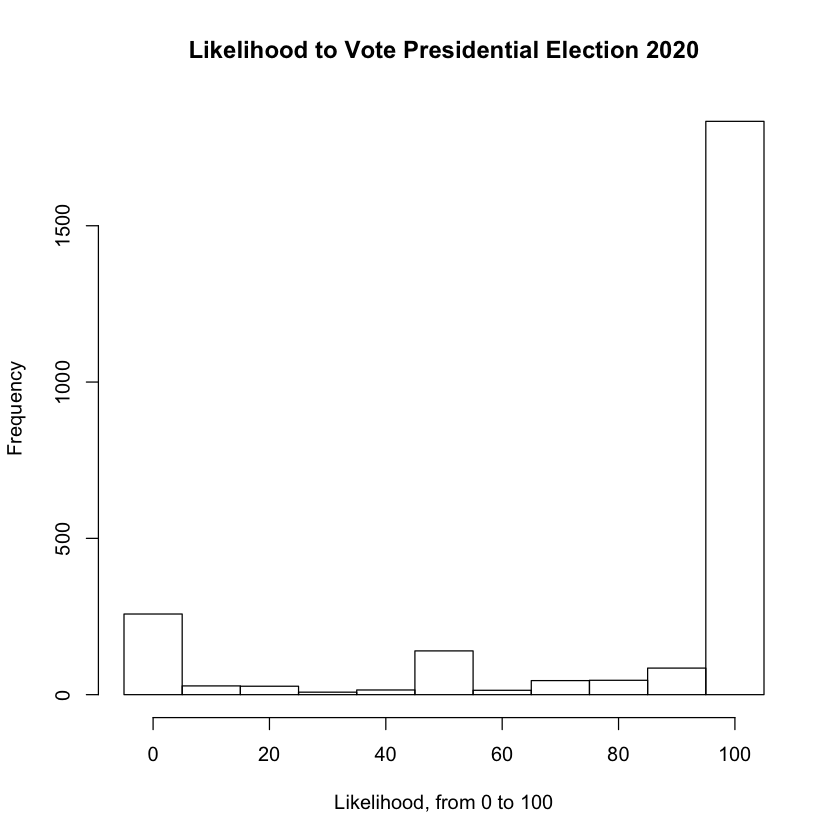

In [34]:
# Plot histogram of intention to vote. Turns out, most people think there's 
# a 100% chance that they'll vote in the presidential election.

hist(A$percent20, breaks = seq(-5, 105, by=10),
    main="Likelihood to Vote Presidential Election 2020",
    xlab="Likelihood, from 0 to 100")

In [35]:
# How does intention to vote compare with registration status?
table(ifelse(A$voter_var==1, "voter", "non-voter"), round(A$percent20, -1))

           
               0   10   20   30   40   50   60   70   80   90  100
  non-voter  223   17   22    3   12   79   13    6   30   16   56
  voter       35    8    8    3    5   57    5   12   43   45 1802

In [36]:
# 30 people registered to vote do not think they'll vote for the 2020 presidential election.
# But since they're registered, maybe they vote for other elections anyway. 
# CNN article: https://www.cnn.com/2018/11/05/politics/voting-2018-turnout-eligible-voters/index.html
# "Here's why 6 in 10 eligible voters might not vote tomorrow"

# 102 people who are not currently registered to vote think there is an 80% chance or more
# that they'll vote. There's probably a reason they are not registered yet. 
# We want to consider them as potential voters.

30 + 16 + 56

[1] 102

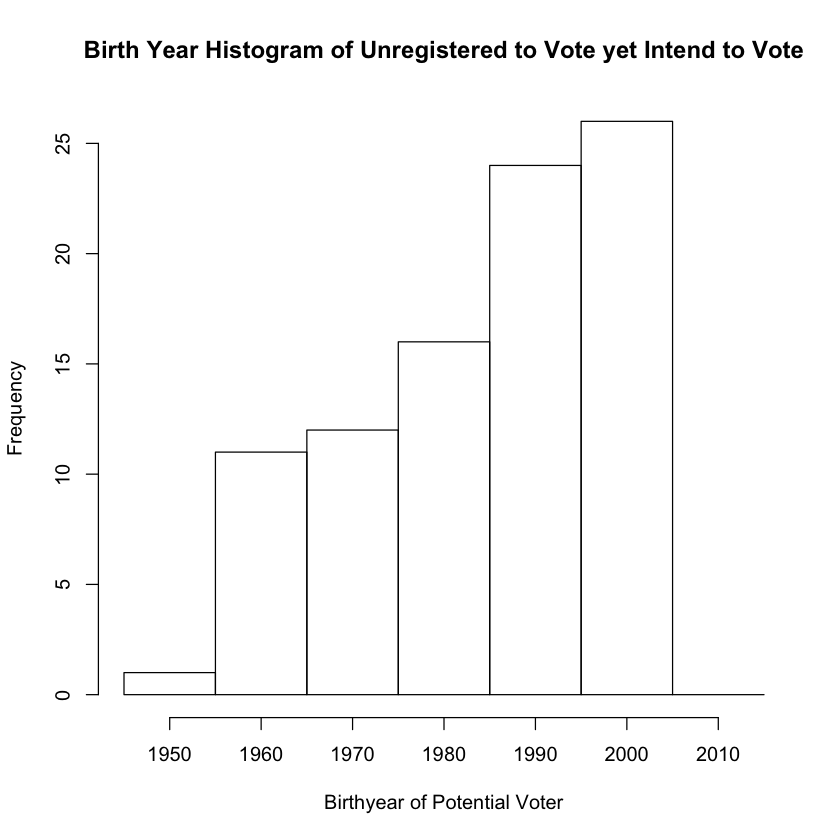

In [37]:
# Let's find out a little more about the people who intend to vote
# but have not registered to vote yet. 

hist (A$birthyr[A$percent20 >= 80 & A$voter_var == 0],
     main="Birth Year Histogram of Unregistered to Vote yet Intend to Vote",
     xlab= "Birthyear of Potential Voter",
     breaks=seq(1945, 2015, 10))

In [38]:
# Seems like registration alone is not a perfect definition of a voter,
# as a lot of young people born in early 2000s may have yet to register
# but have a full intention to vote. 

# Hence, mark as voters those who are unregistered but intend to vote 
sum(A$voter_var)
# result: 2,023 currently classified voters

[1] 2023

In [39]:
nrow(A[A$percent20 >= 80 & A$voter_var == 0,])
# result: 90 additional voters

[1] 90

In [40]:
# Classified additional non-registered but high intention people as voters
A$voter_var[A$percent20 >= 80 & A$voter_var == 0] <- 1 

In [41]:
# Resulting number of voters we're interested in:
sum(A$voter_var)
# 2,113 people

[1] 2113

In [42]:
# Either pid1r and pid1d is randomly shown to a survey respondent, 
# but they ask the same question. 
# 1 is Democrat
# 2 is Republican
# 3 is independent
# 4 is something else 

# How many respondents legitimately skipped both questions? 
nrow(subset(A[, c("pid1d", "pid1r")], pid1d == -1 & pid1r == -1))

[1] 148

In [43]:
# Why did they legitimately skip? No idea yet. 
head(subset(A, pid1d == -1 & pid1r == -1, rand_pid))

,rand_pid
15,2
32,1
36,2
186,1
231,1
338,1


In [44]:
# Create a new column that contains party ID regardless of the random order 
A$pid1_combined <- A$pid1r
A$pid1_combined[A$pid1r == -1] <- A$pid1d[A$pid1r == -1]


In [45]:
# Take a look
head(A[, c("pid1_combined", "pid1r", "pid1d")], 10)

pid1_combined,pid1r,pid1d
2,-1,2
2,2,-1
3,3,-1
3,-1,3
2,2,-1
1,1,-1
3,3,-1
2,2,-1
2,2,-1
1,-1,1


In [46]:
table(A$pid1_combined)


 -7  -1   1   2   3   4 
  2 148 857 609 767 117 

In [47]:
# Examine voting patterns of those who identified themselves as Dem, Rep, or Independent 
votingpattern = filter(A, pid1_combined %in% c(1, 2, 3, 4))

In [48]:
# Create a factor and relabel data 

votingpattern$pid1_combined = 
    factor(votingpattern$pid1_combined, 
           levels = c(1, 2, 3, 4),
           labels = c("Dem",  "Rep", "Independent", "Unknown"),
           ordered=TRUE)

In [49]:
votingpattern$house18p = 
    factor(votingpattern$house18p, 
           levels = c(1, 3, 2, -1),
           labels = c("Dem", "3rd", "Rep", "Unknown"),
           ordered=TRUE)

In [50]:
tab <- with(filter(votingpattern, house18p != -1), 
            table(house18p
                , pid1_combined
                 ))
round(prop.table(tab, margin = 2)*100, 2)

         pid1_combined
house18p    Dem   Rep Independent Unknown
  Dem     78.30  2.79       34.03   26.50
  3rd      0.12  0.82        3.00    8.55
  Rep      1.52 75.21       26.60   27.35
  Unknown 20.07 21.18       36.38   37.61

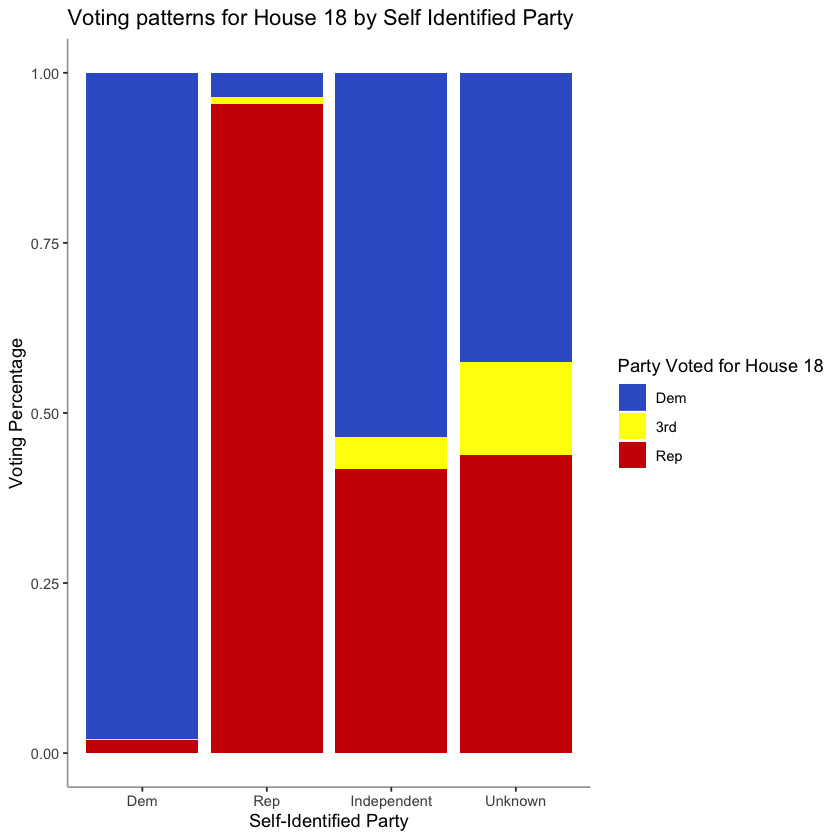

In [51]:
ggplot(subset(votingpattern, house18p != "Unknown"), 
       aes(fill=house18p
           , x=pid1_combined)
      ) + 
scale_fill_manual(values=c("royalblue3", "yellow1", "red3"), 
                  name = "Party Voted for House 18") + 
geom_bar(position="fill", stat="count") +
xlab("Self-Identified Party") + 
ylab("Voting Percentage") +
ggtitle("Voting patterns for House 18 by Self Identified Party")+
theme(axis.line = element_line(colour = "darkgray"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) 


In [52]:
votingpattern$senate18p = 
    factor(votingpattern$senate18p, 
           levels = c(1, 3, 2, -1),
           labels = c("Dem", "3rd", "Rep", "Unknown"),
           ordered=TRUE)

In [53]:
tab <- with(filter(votingpattern, senate18p != -1), 
            table(senate18p
                , pid1_combined
                 ))
round(prop.table(tab, margin = 2)*100, 2)

         pid1_combined
senate18p   Dem   Rep Independent Unknown
  Dem     59.98  3.61       25.59   18.80
  3rd      0.23  0.33        2.61    4.27
  Rep      1.17 55.17       18.41   25.64
  Unknown 38.62 40.89       53.39   51.28

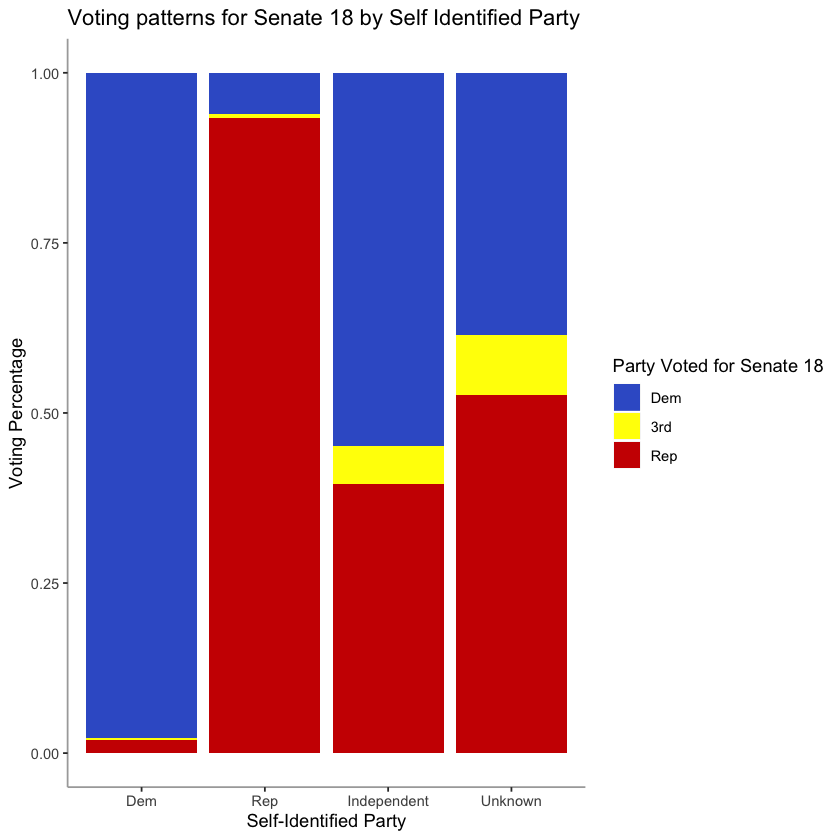

In [54]:
ggplot(subset(votingpattern, senate18p != "Unknown"), 
       aes(fill=senate18p
           , x=pid1_combined)
      ) + 
scale_fill_manual(values=c("royalblue3", "yellow1", "red3"), 
                  name = "Party Voted for Senate 18") + 
geom_bar(position="fill", stat="count") +
xlab("Self-Identified Party") + 
ylab("Voting Percentage") +
ggtitle("Voting patterns for Senate 18 by Self Identified Party")+
theme(axis.line = element_line(colour = "darkgray"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) 


In [55]:
votingpattern$gov18p = 
    factor(votingpattern$gov18p, 
           levels = c(1, 3, 2, -1),
           labels = c("Dem", "3rd", "Rep", "Unknown"),
           ordered=TRUE)

In [56]:
tab <- with(filter(votingpattern, gov18p != -1 & gov18p != -7), 
            table(gov18p
                , pid1_combined
                 ))
round(prop.table(tab, margin = 2)*100, 2)

         pid1_combined
gov18p      Dem   Rep Independent Unknown
  Dem     59.86  2.96       24.28   24.79
  3rd      0.47  1.48        2.87    5.98
  Rep      3.50 58.78       24.67   25.64
  Unknown 36.17 36.78       48.17   43.59

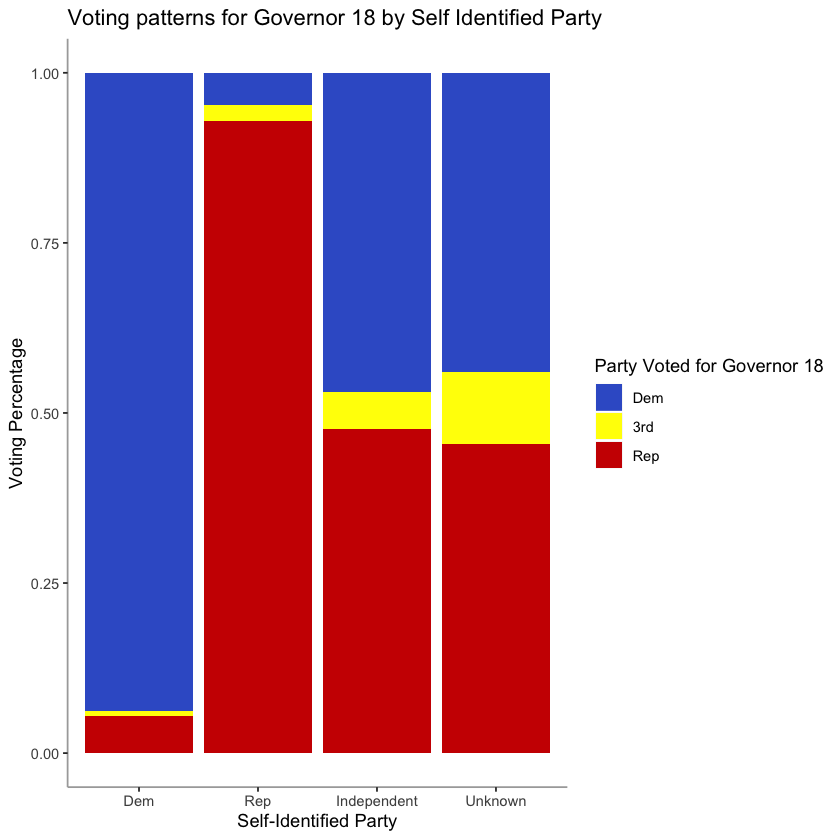

In [57]:
ggplot(subset(votingpattern, gov18p != "Unknown"), 
       aes(fill=gov18p
           , x=pid1_combined)
      ) + 
scale_fill_manual(values=c("royalblue3", "yellow1", "red3"), 
                  name = "Party Voted for Governor 18") + 
geom_bar(position="fill", stat="count") +
xlab("Self-Identified Party") + 
ylab("Voting Percentage") +
ggtitle("Voting patterns for Governor 18 by Self Identified Party")+
theme(axis.line = element_line(colour = "darkgray"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) 

In [58]:
# Presidential 

tab <- with(filter(votingpattern, vote16 != -1 & vote16 != -7), 
            table(case_when(
                    vote16 ==1 ~ "Donald Trump (Rep)",
                    vote16 ==2 ~ "Hilary Clinton (Dem)",
                    vote16 ==3 ~ "Someone Else (3rd")
                , pid1_combined
                 ))
round(prop.table(tab, margin = 2)*100, 2)

                      pid1_combined
                         Dem   Rep Independent Unknown
  Donald Trump (Rep)    4.64 91.99       43.05   44.30
  Hilary Clinton (Dem) 92.21  2.73       33.59   29.11
  Someone Else (3rd     3.14  5.27       23.36   26.58

In [59]:
# So it's pretty clear that the folks who self-identify as independent 
# or in support of a non-major party tend to split their votes between 
# Democrat and Republican candidates.
# The folks who self-identify as a Democrat or Republican has a small 
# percentage of people who vote for another party. 

# Given the history of the presidential election in 2016, maybe it's better
# to not count the presidential election vote as an indicator of whether
# somebody is an independent voter. The candidates were quite controversial
# and many people who did not live in swing states chose to vote for 
# a candidate from a different party just because they felt like it. 

In [60]:
# Create a dem vote count 

A$dem_vote_count <-  
    case_when(
        A$house18p == 1 ~ 1,
        TRUE ~ 0,
        FALSE ~ 0) +
    case_when(
        A$senate18p == 1 ~ 1,
        TRUE ~ 0,
        FALSE ~ 0) +
    case_when(
        A$gov18p == 1 ~ 1, # Not available for all states 
        TRUE ~ 0,
        FALSE ~ 0) 

summary(A$dem_vote_count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.9992  2.0000  3.0000 

In [61]:
# Create a rep vote count 

A$rep_vote_count <-  
    case_when(
        A$house18p == 2 ~ 1,
        TRUE ~ 0,
        FALSE ~ 0) +
    case_when(
        A$senate18p == 2 ~ 1,
        TRUE ~ 0,
        FALSE ~ 0) +
    case_when(
        A$gov18p == 2 ~ 1, # Not available for all states 
        TRUE ~ 0,
        FALSE ~ 0) 

summary(A$rep_vote_count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.7392  2.0000  3.0000 

In [62]:
# Create a third party vote count 

A$third_vote_count <- 
    case_when(
        A$house18p == 3 ~ 1,
        TRUE ~ 0,
        FALSE ~ 0) +
    case_when(
        A$senate18p == 3 ~ 1,
        TRUE ~ 0,
        FALSE ~ 0) +
    case_when(
        A$gov18p == 3 ~ 1, # Not available for all states 
        TRUE ~ 0,
        FALSE ~ 0) 

summary(A$third_vote_count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.0484  0.0000  3.0000 

In [63]:
A$total_vote_count <- A$dem_vote_count + A$rep_vote_count + A$third_vote_count

summary(A$total_vote_count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   2.000   1.787   3.000   3.000 

In [64]:
table(A$total_vote_count)


  0   1   2   3 
679 150 696 975 

In [65]:
# Let's look at the percentage voted for democrats 

summary(A$dem_vote_count/A$total_vote_count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  1.0000  0.5569  1.0000  1.0000     679 

In [66]:
table(A$pid1_combined, round(A$dem_vote_count/A$total_vote_count, 2))

    
       0 0.33 0.5 0.67   1
  -7   2    0   0    0   0
  -1  10    1   2    0   7
  1    7    4  12   22 671
  2  459   14   8    3  13
  3  220   20  19   24 223
  4   42    3   2    3  30

Warning message:
“Removed 551 rows containing non-finite values (stat_bin).”

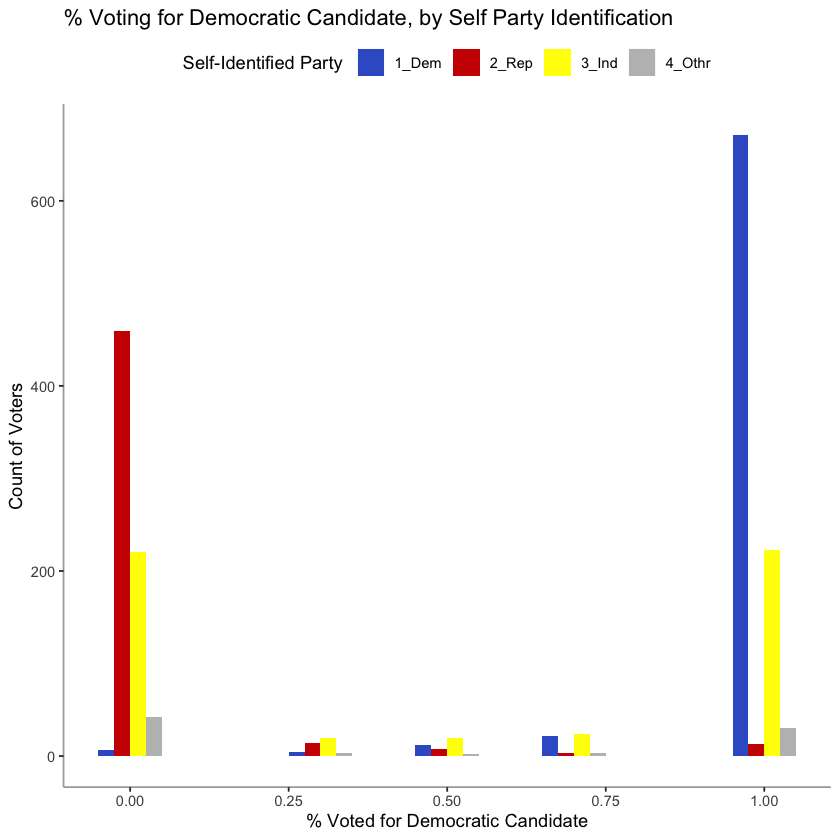

In [161]:
p<- ggplot(data=A[A$pid1_combined > 0, ], 
       aes(x=dem_vote_count/total_vote_count,
           fill=case_when(pid1_combined ==1 ~ "1_Dem",
                          pid1_combined ==2 ~ "2_Rep",
                          pid1_combined ==3 ~ "3_Ind",
                          pid1_combined ==4 ~ "4_Othr")
          )
      ) + 
geom_histogram(position="dodge",binwidth=0.1)+
theme(legend.position="top") +
ggtitle("% Voting for Democratic Candidate, by Self Party Identification") +
xlab("% Voted for Democratic Candidate") + 
ylab("Count of Voters")+
scale_fill_manual(values=c("royalblue3", "red3", "yellow1", "gray"), 
                  name = "Self-Identified Party") + 
theme(axis.line = element_line(colour = "darkgray"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) 

p

Warning message:
“Removed 551 rows containing non-finite values (stat_bin).”

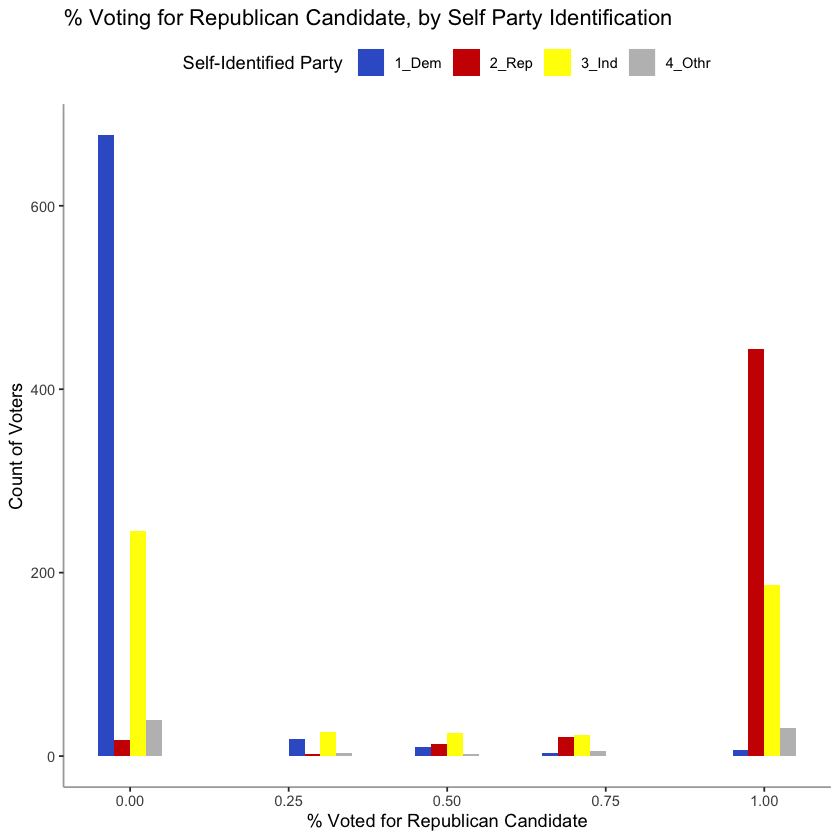

In [162]:
p<- ggplot(data=A[A$pid1_combined > 0, ], 
       aes(x=rep_vote_count/total_vote_count,
           fill=case_when(pid1_combined ==1 ~ "1_Dem",
                          pid1_combined ==2 ~ "2_Rep",
                          pid1_combined ==3 ~ "3_Ind",
                          pid1_combined ==4 ~ "4_Othr")
          )
      ) + 
geom_histogram(position="dodge", binwidth=0.1)+
theme(legend.position="top") +
ggtitle("% Voting for Republican Candidate, by Self Party Identification") +
xlab("% Voted for Republican Candidate") + 
ylab("Count of Voters")+
scale_fill_manual(values=c("royalblue3", "red3", "yellow1", "gray"), 
                  name = "Self-Identified Party") + 
theme(axis.line = element_line(colour = "darkgray"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) 


p

In [69]:
# So ... probably take self-identified independents
# plus self-identified party-aligned who have a history 
# of voting for the other party anyway, if more than twice.

table(A$pid1_combined)


 -7  -1   1   2   3   4 
  2 148 857 609 767 117 

In [70]:
A$independent <- 0

In [71]:
# If self-identified as independent, then mark as independent
A$independent[A$pid1_combined==3] <- 1

In [72]:
# If did NOT self-identify as independent, but voting patterns show independence,
# then mark as independent. 
mix_pattern_voters <- 
A[A$dem_vote_count/A$total_vote_count   != 1 &
  A$rep_vote_count/A$total_vote_count   != 1 &
  A$third_vote_count/A$total_vote_count != 1 &
  A$total_vote_count != 0,
 c("dem_vote_count", "rep_vote_count", "third_vote_count", "total_vote_count")]

head(mix_pattern_voters)

,dem_vote_count,rep_vote_count,third_vote_count,total_vote_count
5,1,2,0,3
24,0,1,1,2
27,2,1,0,3
47,2,1,0,3
58,1,1,1,3
77,0,1,2,3


In [73]:
nrow(mix_pattern_voters)

[1] 174

In [74]:
table(mix_pattern_voters$total_vote_count)


  2   3 
 60 114 

In [75]:
A$independent[
    A$dem_vote_count/A$total_vote_count   != 1 &
    A$rep_vote_count/A$total_vote_count   != 1 &
    A$third_vote_count/A$total_vote_count != 1 &
    A$total_vote_count != 0
] <- 1

In [76]:
table(A$independent)


   0    1 
1640  860 

In [77]:
# So now we have our "independent voter" population

table(case_when(A$voter_var==1 ~ "Voter",
                TRUE ~ "Non-Voter"), 
      case_when(A$independent==1 ~ "Independent",
               TRUE ~ "Not Independent")
      )

           
            Independent Not Independent
  Non-Voter         152             235
  Voter             708            1405

In [78]:
# Examine the relationship between belief in Russian interference and Donald Trump's coordination
table(case_when(A$russia16 == 1 ~ "Russia interfered",
                A$russia16 == 2 ~ "Russia did not interfere",
                TRUE  ~ "No ans",
                FALSE ~ "No ans")
      ,case_when(A$coord16 == 1 ~ "Trump coord. with Russia",
                A$coord16 == 2 ~ "Trump didn't coord.",
                TRUE  ~ "No ans",
                FALSE ~ "No ans")
     )

                          
                           No ans Trump coord. with Russia Trump didn't coord.
  No ans                        0                        1                   2
  Russia did not interfere      0                       70                1002
  Russia interfered             1                     1244                 180

In [79]:
# Want to be as conservative as possible, so only if the respondent disagreed with both statements
# we would agree them as believing the investigation to be baseless. 

A$believe_baseless <- case_when(A$russia16 == 2 & A$coord16 == 2 ~ 1,
                               TRUE ~ 0)

summary(A$believe_baseless)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4008  1.0000  1.0000 

In [80]:
table(A$believe_baseless)


   0    1 
1498 1002 

In [81]:
# Do some sanity check that those who believe the investigation to be baseless
# also hold a negative opinion about Special Counselor Mueller 
# or have a high approval of Donald Trump.

summary(A$ftmueller[A$ftmueller != 997]) # Exclude missing val 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   15.75   51.00   52.41   90.00  100.00      17 

Warning message:
“Removed 17 rows containing missing values (geom_point).”Warning message:
“Removed 17 rows containing missing values (geom_point).”

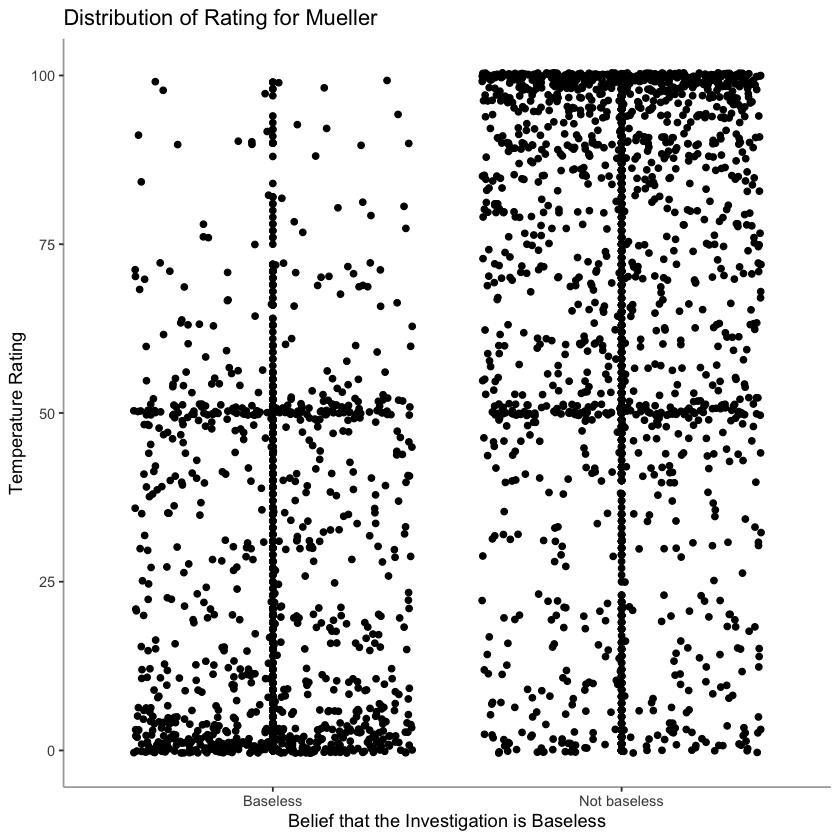

In [82]:
ggplot(A[A$ftmueller != 997,], 
       aes(x=case_when(believe_baseless == 1 ~ "Baseless",
                      TRUE ~ "Not baseless")
           , y=ftmueller)) + 
geom_point() +
geom_jitter()+
ggtitle("Distribution of Rating for Mueller") +
xlab("Belief that the Investigation is Baseless") + 
ylab("Temperature Rating")+
theme(axis.line = element_line(colour = "darkgray"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) 

In [83]:
# A bulk of the people who believe the investigation to be baseless hold a cold feeling
# toward Special Counsel Mueller. And the other group, warm. 
# Who are the outliers? 

head(A[A$believe_baseless == 1 & A$ftmueller >= 65 & A$ftmueller != 997, ], 1)


,version,caseid,weight,weight_spss,form,follow,addtime,reg,whenreg,howreg,...,optintimestamp,completes,voter_var,pid1_combined,dem_vote_count,rep_vote_count,third_vote_count,total_vote_count,independent,believe_baseless
31,ANES 2018 Pilot Study main version 20190129,33,4.467218,2.592773,1,1,2,1,2,3,...,8/9/17,122,1,2,0,3,0,3,0,1


In [84]:
ind_voter <- A[A$voter_var ==1 & A$independent==1, ]

In [85]:
head(ind_voter)

,version,caseid,weight,weight_spss,form,follow,addtime,reg,whenreg,howreg,...,optintimestamp,completes,voter_var,pid1_combined,dem_vote_count,rep_vote_count,third_vote_count,total_vote_count,independent,believe_baseless
3,ANES 2018 Pilot Study main version 20190129,3,0.9720616,0.5641846,1,4,3,3,-1,-1,...,6/13/14,8,1,3,0,0,0,0,1,0
4,ANES 2018 Pilot Study main version 20190129,4,2.4500732,1.4220225,1,4,2,1,4,-1,...,10/28/15,42,1,3,0,0,0,0,1,1
5,ANES 2018 Pilot Study main version 20190129,5,1.6348200,0.9488495,2,1,3,1,4,-1,...,11/11/15,33,1,2,1,2,0,3,1,0
7,ANES 2018 Pilot Study main version 20190129,7,0.4262780,0.2474117,1,1,3,1,4,-1,...,,159,1,3,3,0,0,3,1,0
17,ANES 2018 Pilot Study main version 20190129,18,0.9247133,0.5367036,1,1,3,1,4,-1,...,,283,1,3,0,3,0,3,1,1
24,ANES 2018 Pilot Study main version 20190129,26,0.4262533,0.2473974,1,1,2,1,4,-1,...,2/8/16,71,1,4,0,1,1,2,1,0


In [86]:
nrow(ind_voter)

[1] 708

### C. Testing Method: One-Sample T-Test

`baseless` is a custom variable and is either 1 (believe investigation is baseless) or 0 (do NOT believe it is baseless.) Then we can examine whether the mean of `baseless` in our population can be called "a majority". In this case, we would do a one-sample t-test. 

#### Why not other tests?
It would not be appropriate to use a paired test when there are no naturally occurring pairs. The variable `baseless` is a Bernoulli variable, which is either 1 or 0. Hence, a parametric test is appropriate. 

#### Assumptions for the t-test
1. Normally distributed data: **Yes, if we're talking about the distribution of the sampling mean.** The actual data is either 1 or 0. The mean, however, could fall anywhere between 1 and 0. If the population has a mean, $\mu$, then by the CLT, the sampling mean would be normally distributed around $\mu$. Since we have a large sample 
2. Independence: **Yes.** The survey data was collected over thousands of adults. 
3. Homogeneity of variance: **Not applicable.** We only have one group. 
4. Interval data: **Yes.** The data is either 1 or 0, so the data itself is binary, but the sampling mean will be any number between 0 and 1. 

### Hypothesis for Q3 

* $H_0$: The mean of `baseless` is 0.5 among independent voters (about the same number of people believe the investigation to be baseless as those who believe it to be NOT baseless.)
* $H_A$: The mean of `baseless` is significantly different from 0.5 (a majority of people believe the investigation to be baseless OR a majority of people believe it to be NOT baseless.)


### D. Test Results


In [87]:
table(ind_voter$believe_baseless)


  0   1 
424 284 

In [88]:
summary(ind_voter$believe_baseless)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4011  1.0000  1.0000 

In [89]:
t.test(x=ind_voter$believe_baseless, mu = 0.5, alternative = "two.sided")

#running as one-sample proportions test JUUUUUST to check... ;)
n<-nrow(ind_voter)
x<-as.numeric(table(ind_voter$believe_baseless)[2])
n
x
prop.test(x, n, p = 0.5, 
                 correct = FALSE)


	One Sample t-test

data:  ind_voter$believe_baseless
t = -5.3637, df = 707, p-value = 1.106e-07
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.3649397 0.4373202
sample estimates:
mean of x 
0.4011299 


[1] 708

[1] 284


	1-sample proportions test without continuity correction

data:  x out of n, null probability 0.5
X-squared = 27.684, df = 1, p-value = 1.429e-07
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.3656543 0.4376727
sample estimates:
        p 
0.4011299 


#### (1) The statistical significance 
40.11% of the independent voters believe the investigation to be baseless. This is highly statistically significant (p.value < 1%). Therefore, we can reject the null hypothesis that 50% of the independent voters believe the investigation is baseless. In fact, a majority (nearly 60%) of them appear to believe the opposite--that it is not baseless.

#### (2) the practical significance

In [90]:
# Let's calculate the effect size using cohensD
cohensD(ind_voter$believe_baseless,
        mu = 0.5)

[1] 0.2015807

The effect size tells us why we should or should not care about the result. The cohen's D we got is 0.2, which is considered small, but not meaningless. I think the public would still be interested in the article called, "60% of independent voters do NOT believe the investigation to be baseless" on an internet news, although it probably won't make the front page. 

## Question 4: Was anger or fear more effective at driving increases in voter turnout from 2016 to 2018?

### A. Introduction

Anger is operationalized as if they feel angry about how things are going into the country, using a likert scale from "Not at all" to "Extremely." Fear is also operationalized as if they feel afraid about how things are going into the country, using a likert scale from "Not at all" to "Extremely." Both anger and fear were assessed in a cross-sectional survey in 2018, so it is assumed that their level of anger or fear has remained constant from 2016 to 2018. We also do not know if these two variables are specifically related to their reason for choosing to vote, as it may stem from other non-voting reasons. 
Voter turnout in 2016 is characterized as definitely voted or probably voted, and in 2018 as definitely voted (in person or mail) or probably voted. It is possible there is recall bias for remembering if someone voted in 2016. It is possible that voting habits were different for voters in the years 2016 and 2018, and depend on variables other than anger and fear.

In [91]:
#voter 2016 (binary), voter 2018 (binary), anger (ordinal), fear (ordinal) 
# average angry scores between voted in both, didn't vote in both? -->avg who voted both
# Approach 1: the 'easiest' way is to do t-tests for 2016 angry, fear, 2018 angry, fear (4 tests)

#geangry geafraid  (ordinal 1 to 5)
table(A$geangry)  #missing by -7
table(A$geafraid) #missing with -7
#consider an imputation approach

B<-subset(A,A$geangry>0 & A$geafraid>0)
table(B$geafraid)
#~increases in voter turnout from 2016 to 2018~
#Defining voter as "registered voter"
#Defining voter as "voted in 2018 AND 2016"
#turnout18 and turnout18ns (definitely or probably: binary)
#turnout16 and turnout16b (definitely or probably: binary)
B$vote18<-(B$turnout18<=3 | B$turnout18ns==1) #voted in 2018 = definitely voted and probably voted
B$vote16<-(B$turnout16==1 | B$turnout16b==1) #voted in 2016 - definitely voted and probably voted
table(B$vote18, B$turnout18)
table(B$vote18, B$turnout18ns)
table(B$vote16, B$turnout16)
table(B$vote16, B$turnout16b)
#looks like two wilcoxon rank-sums (or just independent-sample t-tests)
#Approach 1:
    # (2018-2016 voted) ~ angry_ornot


 -7   1   2   3   4   5 
  3 527 470 576 469 455 


 -7   1   2   3   4   5 
  6 607 572 602 426 287 


  1   2   3   4   5 
607 572 602 426 287 

       
          1   2   3   4   5
  FALSE   0   0   0 543  95
  TRUE  967 355 516   0  18

       
          -1    1    2
  FALSE  543    0   95
  TRUE  1838   18    0

       
           1    2    3
  FALSE    0  548   77
  TRUE  1840    0   29

       
          -7   -1    1    2
  FALSE    9  548    0   68
  TRUE     0 1840   29    0

### B. EDA 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


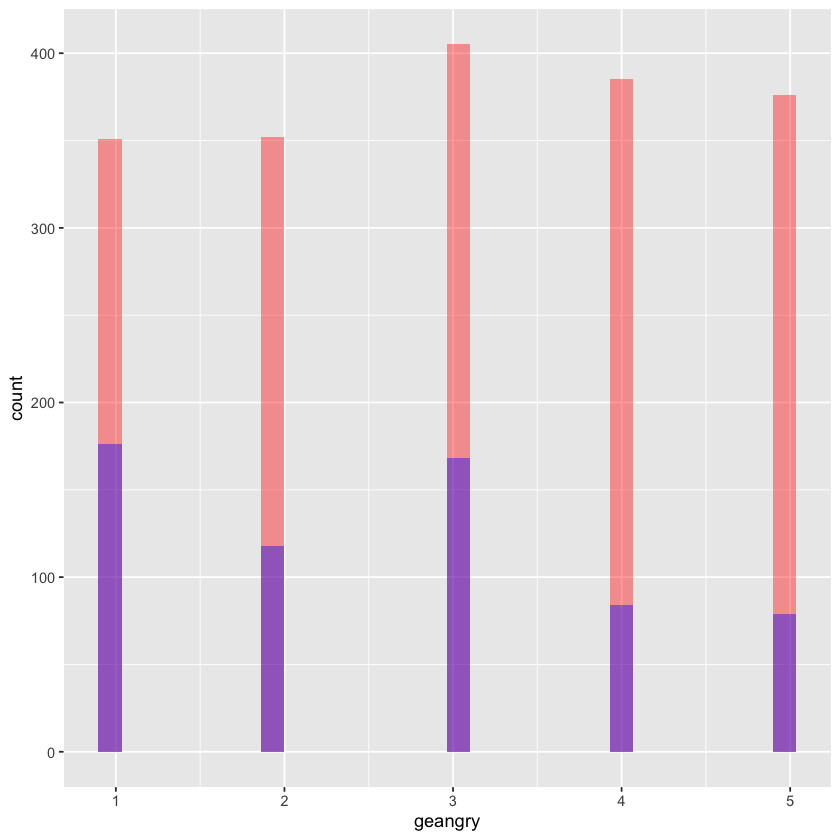

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


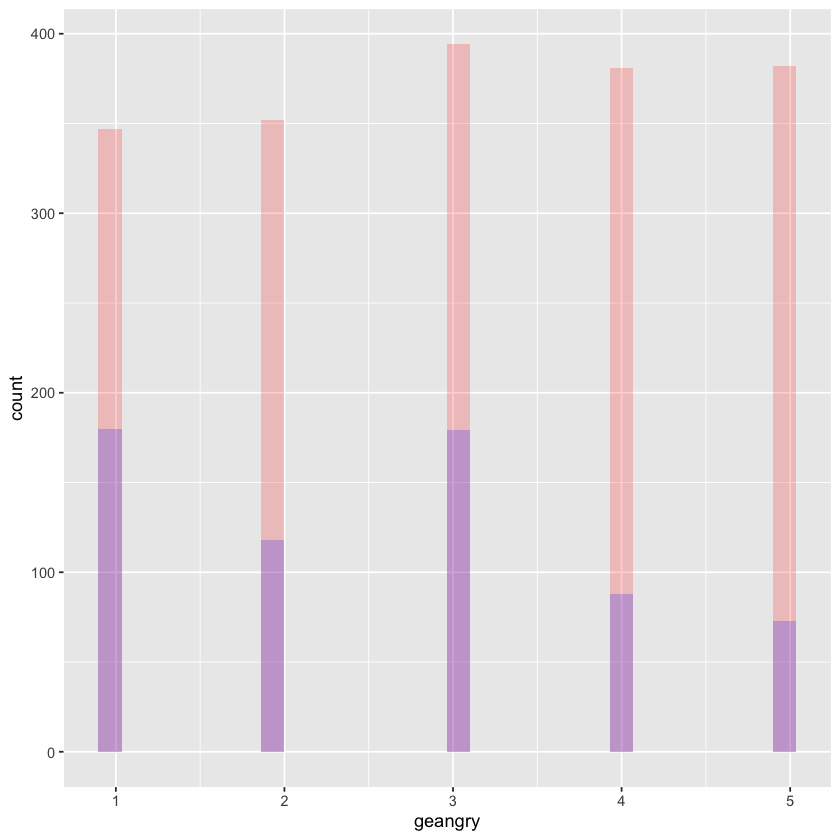

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


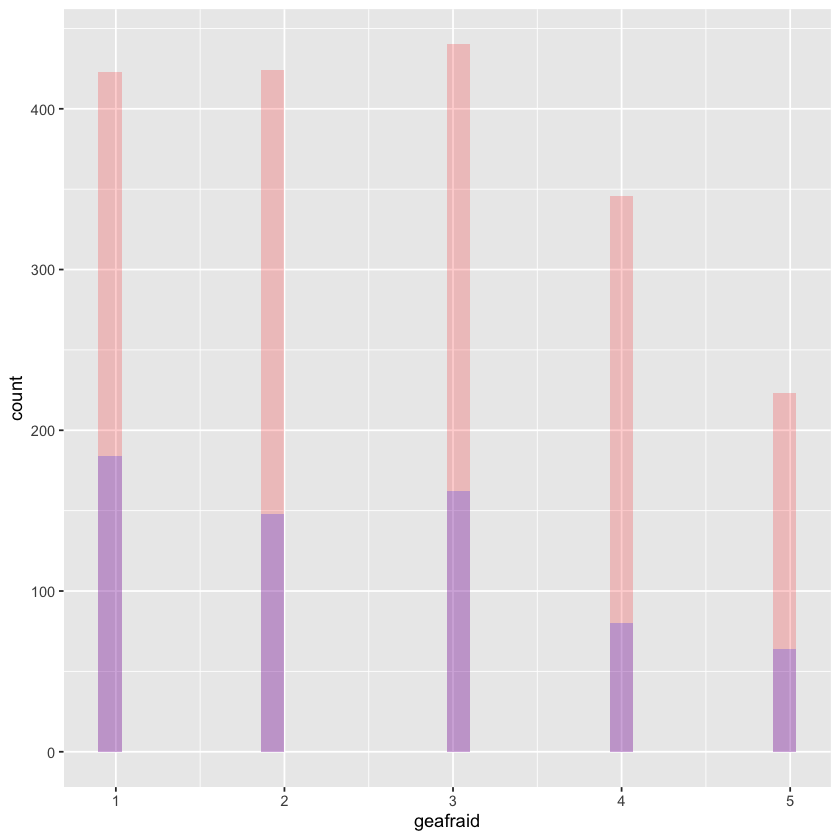

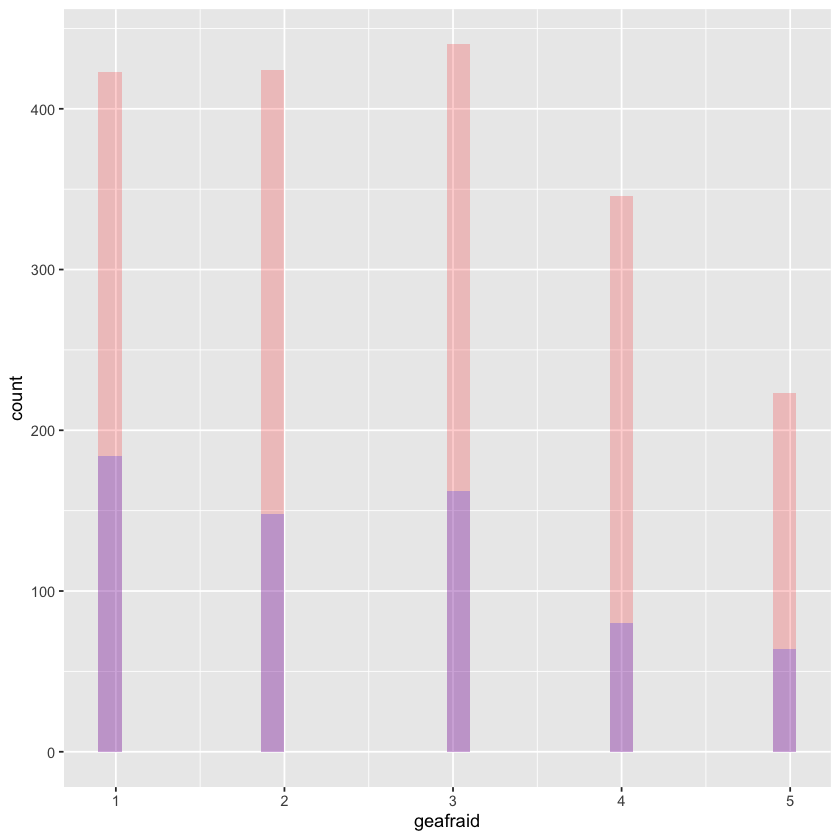

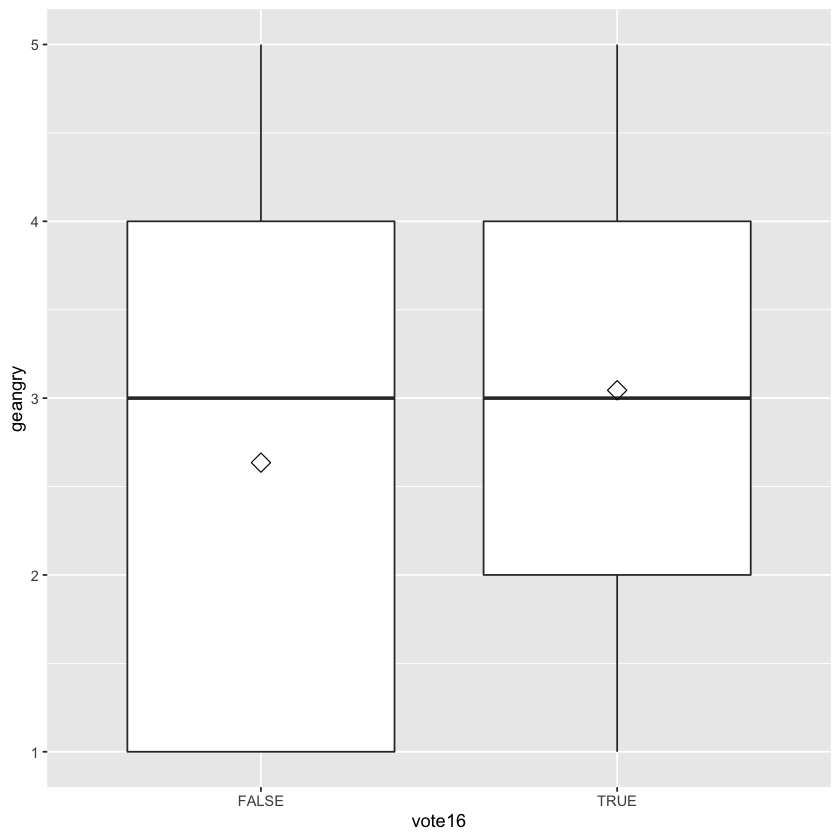

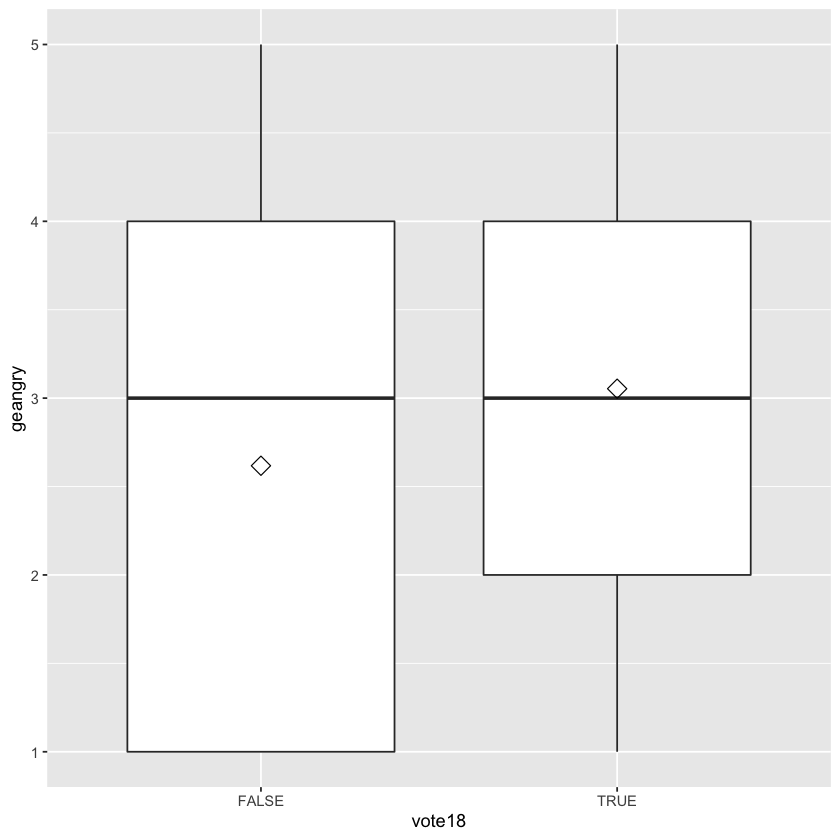

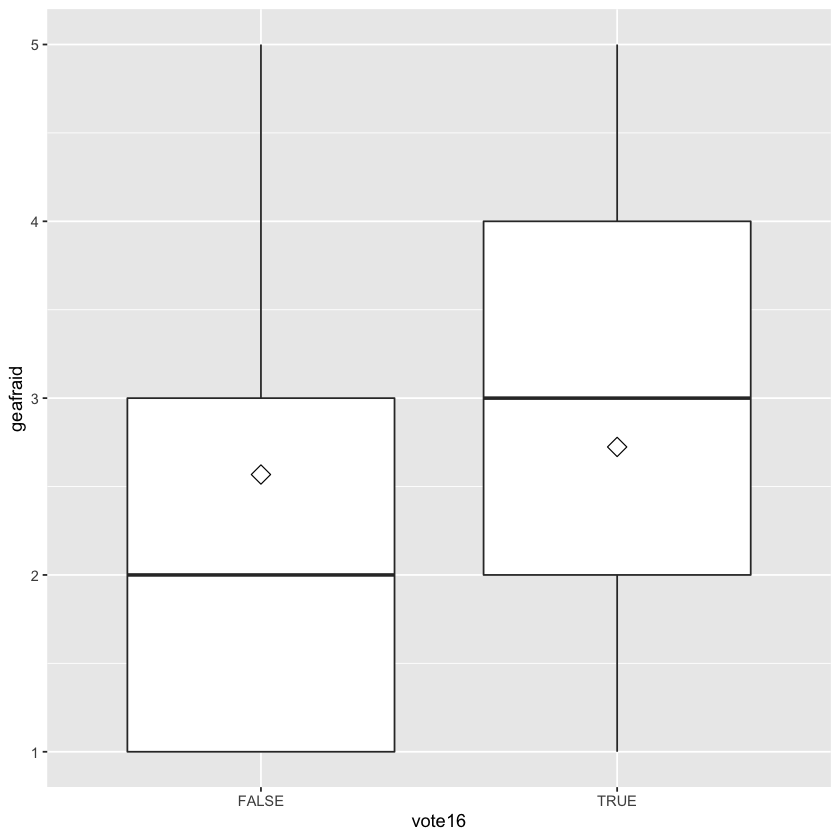

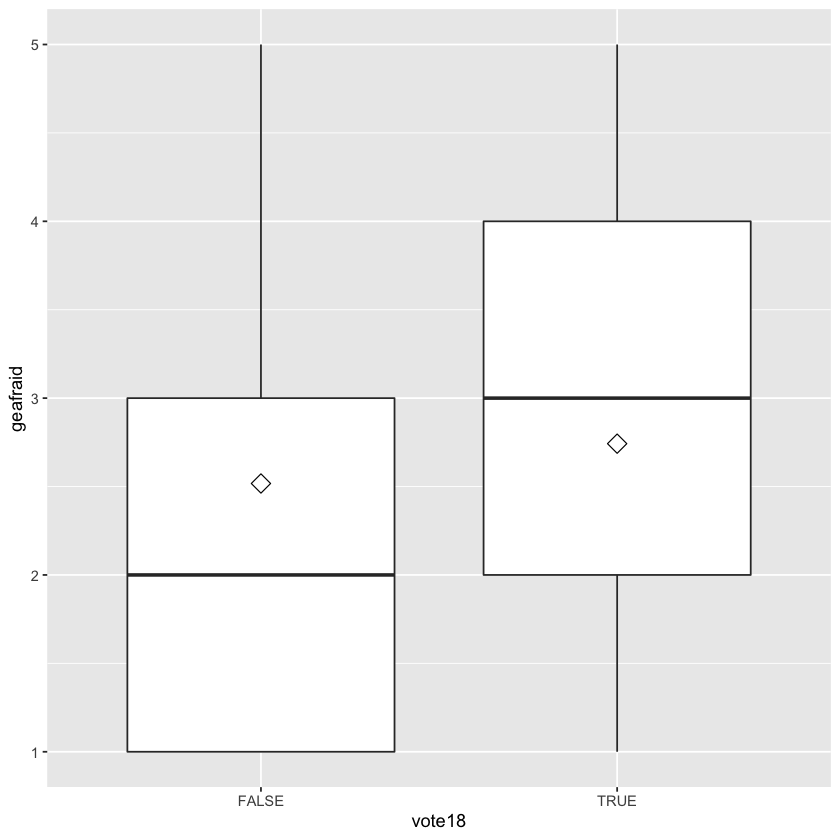

In [92]:
#what was interesting? outliers, missing values, etc.
ggplot(B,aes(x=geangry)) + 
    geom_histogram(data=subset(B,vote16 == T),fill = "red", alpha = 0.4) +
    geom_histogram(data=subset(B,vote16 == F),fill = "blue", alpha = 0.4)
ggplot(B,aes(x=geangry)) + 
    geom_histogram(data=subset(B,vote18 == T),fill = "red", alpha = 0.2) +
    geom_histogram(data=subset(B,vote18 == F),fill = "blue", alpha = 0.2)
ggplot(B,aes(x=geafraid)) + 
    geom_histogram(data=subset(B,vote18 == T),fill = "red", alpha = 0.2) +
    geom_histogram(data=subset(B,vote18 == F),fill = "blue", alpha = 0.2)
ggplot(B,aes(x=geafraid)) + 
    geom_histogram(data=subset(B,vote18 == T),fill = "red", alpha = 0.2) +
    geom_histogram(data=subset(B,vote18 == F),fill = "blue", alpha = 0.2)
ggplot(B, aes(x=vote16, y=geangry)) + 
  geom_boxplot()+ stat_summary(fun.y=mean, geom="point", shape=23, size=4)
ggplot(B, aes(x=vote18, y=geangry)) + 
  geom_boxplot()+ stat_summary(fun.y=mean, geom="point", shape=23, size=4)
ggplot(B, aes(x=vote16, y=geafraid)) + 
  geom_boxplot()+ stat_summary(fun.y=mean, geom="point", shape=23, size=4)
ggplot(B, aes(x=vote18, y=geafraid)) + 
  geom_boxplot()+ stat_summary(fun.y=mean, geom="point", shape=23, size=4)

### C. Testing Method: Independent-samples t-test and Wilcoxon rank-sum test

The bar graphs and tables show the data as ordinal, however since there is sufficient sample size between voter and non voter groups, an independent-samples t-test should be appropriate, despite data being non-normal. Mean difference in anger and afraid scores can be used for practical significance in this case.  Wilcoxon rank-sum test for unpaired tests with ordinal data was also run to check if the same conclusion could be made, using cohen's d measures as practical significance.
Bonferroni correction for 4 tests, significance level is now 0.05/4 = 0.0125


### Hypotheses
$ H_0:\mu_{angry\ rating\ for\ voted\ in\ 2016}=\mu_{angry\ rating\ for\ voted\ in\ 2016} $

$ H_a:\mu_{angry\ rating\ for\ voted\ in\ 2016}\neq\mu_{angry\ rating\ for\ voted\ in\ 2016} $

and

$ H_0:\mu_{angry\ rating\ for\ voted\ in\ 2018}=\mu_{angry\ rating\ for\ voted\ in\ 2018} $

$ H_a:\mu_{angry\ rating\ for\ voted\ in\ 2018}\neq\mu_{angry\ rating\ for\ voted\ in\ 2018} $

and

$ H_0:\mu_{fear\ rating\ for\ voted\ in\ 2016}=\mu_{fear\ rating\ for\ voted\ in\ 2016} $

$ H_a:\mu_{fear\ rating\ for\ voted\ in\ 2016}\neq\mu_{fear\ rating\ for\ voted\ in\ 2016} $

and

$ H_0:\mu_{fear\ rating\ for\ voted\ in\ 2018}=\mu_{fear\ rating\ for\ voted\ in\ 2018} $

$ H_a:\mu_{fear\ rating\ for\ voted\ in\ 2018}\neq\mu_{fear\ rating\ for\ voted\ in\ 2018} $



### D. Test Results

In [93]:
table(B$geangry, B$vote16)

   
    FALSE TRUE
  1   176  351
  2   118  352
  3   168  405
  4    84  385
  5    79  376

In [94]:
cohen.d(B$geangry~B$vote16)
t.test(B$geangry~B$vote16)
wilcox.test(B$geangry~B$vote16) 
paste("According to Wilcoxon rank-sum test, there is a",
      "significant difference in anger scores for voters vs. non-voters in 2016. Anger score was ",
      round(mean(B$geangry[B$vote16==T])-mean(B$geangry[B$vote16==F]),2), 
      "higher for voters in 2016, corressponding to almost half a rank up on the 5 point anger scale.",
         "This is a relatively small effect size of d = 0.30")

cohen.d(B$geangry~B$vote18)
t.test(B$geangry~B$vote18)
wilcox.test(B$geangry~B$vote18) 
paste("According to Wilcoxon rank-sum test, there is a",
      "significant difference in anger scores for voters vs. non-voters in 2018. Anger score was ",
      round(mean(B$geangry[B$vote18==T])-mean(B$geangry[B$vote18==F]),2), 
      "higher for voters in 2018, corressponding to almost half a rank up on the 5 point anger scale.",
         "This is a relatively small effect size of d = 0.32")


cohen.d(B$geafraid~B$vote16)
t.test(B$geafraid~B$vote16)
wilcox.test(B$geafraid~B$vote16) 
paste("According to Wilcoxon rank-sum test, there is a",
      "significant difference in afraid scores for voters vs. non-voters in 2016. Fear score was ",
      round(mean(B$geafraid[B$vote16==T])-mean(B$geafraid[B$vote16==F]),2), 
      "higher for voters in 2016, corressponding to almost half a rank up on the 5 point fear scale",
     "This is a relatively insignificant effect size of d = 0.12")


cohen.d(B$geafraid~B$vote18)
t.test(B$geafraid~B$vote18)
wilcox.test(B$geafraid~B$vote18) 
paste("According to Wilcoxon rank-sum test, there is a",
      "significant difference in afraid scores for voters vs. non-voters in 2016. Fear score was ",
      round(mean(B$geafraid[B$vote18==T])-mean(B$geafraid[B$vote18==F]),2), 
      "higher for voters in 2018, corressponding to almost half a rank up on the 5 point fear scale",
     "This is a relatively insignificant effect size of d = 0.17")


Warning message in cohen.d.formula(B$geangry ~ B$vote16):
“Cohercing rhs of formula to factor”


Cohen's d

d estimate: -0.29546 (small)
95 percent confidence interval:
     lower      upper 
-0.3864378 -0.2044822 


	Welch Two Sample t-test

data:  B$geangry by B$vote16
t = -6.5003, df = 1102.4, p-value = 1.212e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5327293 -0.2856882
sample estimates:
mean in group FALSE  mean in group TRUE 
           2.635200            3.044409 



	Wilcoxon rank sum test with continuity correction

data:  B$geangry by B$vote16
W = 487239, p-value = 2.236e-10
alternative hypothesis: true location shift is not equal to 0


[1] "According to Wilcoxon rank-sum test, there is a significant difference in anger scores for voters vs. non-voters in 2016. Anger score was  0.41 higher for voters in 2016, corressponding to almost half a rank up on the 5 point anger scale. This is a relatively small effect size of d = 0.30"

Warning message in cohen.d.formula(B$geangry ~ B$vote18):
“Cohercing rhs of formula to factor”


Cohen's d

d estimate: -0.3150362 (small)
95 percent confidence interval:
     lower      upper 
-0.4054532 -0.2246193 


	Welch Two Sample t-test

data:  B$geangry by B$vote18
t = -7.0456, df = 1159.2, p-value = 3.162e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5571409 -0.3144304
sample estimates:
mean in group FALSE  mean in group TRUE 
           2.617555            3.053341 



	Wilcoxon rank sum test with continuity correction

data:  B$geangry by B$vote18
W = 487821, p-value = 1.169e-11
alternative hypothesis: true location shift is not equal to 0


[1] "According to Wilcoxon rank-sum test, there is a significant difference in anger scores for voters vs. non-voters in 2018. Anger score was  0.44 higher for voters in 2018, corressponding to almost half a rank up on the 5 point anger scale. This is a relatively small effect size of d = 0.32"

Warning message in cohen.d.formula(B$geafraid ~ B$vote16):
“Cohercing rhs of formula to factor”


Cohen's d

d estimate: -0.1184897 (negligible)
95 percent confidence interval:
      lower       upper 
-0.20915664 -0.02782286 


	Welch Two Sample t-test

data:  B$geafraid by B$vote16
t = -2.5732, df = 1077.5, p-value = 0.01021
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.27481095 -0.03702211
sample estimates:
mean in group FALSE  mean in group TRUE 
           2.568000            2.723917 



	Wilcoxon rank sum test with continuity correction

data:  B$geafraid by B$vote16
W = 543820, p-value = 0.008164
alternative hypothesis: true location shift is not equal to 0


[1] "According to Wilcoxon rank-sum test, there is a significant difference in afraid scores for voters vs. non-voters in 2016. Fear score was  0.16 higher for voters in 2016, corressponding to almost half a rank up on the 5 point fear scale This is a relatively insignificant effect size of d = 0.12"

Warning message in cohen.d.formula(B$geafraid ~ B$vote18):
“Cohercing rhs of formula to factor”


Cohen's d

d estimate: -0.1714063 (negligible)
95 percent confidence interval:
      lower       upper 
-0.26152490 -0.08128771 


	Welch Two Sample t-test

data:  B$geafraid by B$vote18
t = -3.767, df = 1122.4, p-value = 0.0001738
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3425224 -0.1079086
sample estimates:
mean in group FALSE  mean in group TRUE 
           2.517241            2.742457 



	Wilcoxon rank sum test with continuity correction

data:  B$geafraid by B$vote18
W = 534198, p-value = 0.0001582
alternative hypothesis: true location shift is not equal to 0


[1] "According to Wilcoxon rank-sum test, there is a significant difference in afraid scores for voters vs. non-voters in 2016. Fear score was  0.23 higher for voters in 2018, corressponding to almost half a rank up on the 5 point fear scale This is a relatively insignificant effect size of d = 0.17"

In [95]:
#summary of results
paste("Table of Average Anger and Afraid Scores between Voters and Non-Voters, Years 2016 and 2018")
data.frame("Anger_Fear"=c("angry","angry","afraid","afraid"),
           "Voted"=c("2016: Yes - No","2018: Yes - No","2016: Yes - No","2018: Yes - No"),
           "mean_diff"=c(0.41,0.44,0.16,0.23), "Cohens_d"=c(0.30,0.32,0.12,0.17),"Stat_Sig"=c(T,T,T,T))


[1] "Table of Average Anger and Afraid Scores between Voters and Non-Voters, Years 2016 and 2018"

Anger_Fear,Voted,mean_diff,Cohens_d,Stat_Sig
angry,2016: Yes - No,0.41,0.30,TRUE
angry,2018: Yes - No,0.44,0.32,TRUE
afraid,2016: Yes - No,0.16,0.12,TRUE
afraid,2018: Yes - No,0.23,0.17,TRUE


#### (1) Statistical significance or (2) Practical significance
- (1) According to both Independent-samples t-test and Wilcoxon rank-sum test, there is a significant difference in anger scores for voters vs. non-voters in 2016. (2) Anger score was  0.41 higher for voters in 2016, corressponding to almost half a rank up on the 5 point anger scale. This is a relatively small effect size of d = 0.30.

- (1) According to both Independent-samples t-test and Wilcoxon rank-sum test, there is a significant difference in anger scores for voters vs. non-voters in 2018. (2) Anger score was  0.44 higher for voters in 2018, corressponding to almost half a rank up on the 5 point anger scale. This is a relatively small effect size of d = 0.32

- (1) According to both Independent-samples t-test and Wilcoxon rank-sum test, there is a significant difference in afraid scores for voters vs. non-voters in 2016. (2) Fear score was  0.16 higher for voters in 2016, corressponding to almost half a rank up on the 5 point fear scale This is a relatively insignificant effect size of d = 0.12

- (1) According to both Independent-samples t-test and Wilcoxon rank-sum test, there is a significant difference in afraid scores for voters vs. non-voters in 2016. (2) Fear score was  0.23 higher for voters in 2018, corressponding to almost half a rank up on the 5 point fear scale This is a relatively insignificant effect size of d = 0.17

Taken together, voters had significantly higher angry or afraid scores (scale of 1 to 5) in the years 2016 and 2018 (Wilcoxon Rank-Sum Test, p<0.0125). The mean difference in anger between voters and non-voters was not much different in 2016 (mean difference = 0.41, cohen's d=0.30) compared to 2018 (mean difference = 0.44, cohen's d=0.32). Similarly, the mean difference in fear between voters and non-voters was not much different in 2016 (mean difference = 0.16, cohen's d=0.12) compared to 2018 (mean difference = 0.23, cohen's d=0.17).

Very statistically significant, but NOT practically significant! 


## Question 5: Does rural resentment go hand in hand with an anti-immigrant sentiment? 

### A. Introduction and Relevance 

In 2018, Danielle Kurtzleben from NPR reported in her article titled "Rural Voters Played A Big Part In Helping Trump Defeat Clinton" that rural voters increasingly vote more Republican, while urban voters vote more Democratic. In another article, "Is 'Rural Resentment' Driving Voters To Donald Trump?", she claims that "rural resentment" may have driven voters toward Trump. She describes rural resentment as "intense, negative feelings against people in the cities" by rural citizens, arising from the "sense that people in those communities are not getting their fair share compared to people in the cities." 

In this research, we examine the relationship between rural resentment and anti-immigration sentiments. Trump is well-known for anti-immigration messages, such as his platform to build a wall on the US-Mexican border. We hypothesize that sources of rural resentment may originate from the feeling that local rural communities face economic and social deterioration, which may result in xenophobic attitudes. 

#### Operationalization 
We defined rural resentment as responding that rural people are looked down upon a "Great deal" or "A lot" and also responding that rural people get "A great deal less" or "Moderately less" than what they deserve. 

There are a list of questions related to immigration, but the general feelings toward immigrants was operationalized by the `ftimmig` variable, which was a custom thermometer rating. Other questions were specific to current policy, current events, or specific to "*illegal* immigration" and while those could reflect anti-immigration sentiments, we found the topics to be too narrow. Nonetheless, we examine the distribution of responses to the topic-specific questions to understand the relationship between those responses and the thermometer rating. 

#### Potential gaps 
One challenge is that the terms rural or urban are not definitive or clear cut. There is a wide spectrum of living situations. So what the survey respondents perceive as rural or urban will be completely subjective. Additionally, the concept of immigrant to one person may equate to a person of color, while it means citizenship or nationality to another. 

Another challenge is with quantifying any emotion or opinion. We have a thermometer rating immigrants in the survey, but what each number means to each respondent could vary greatly. Additionally, the survey only asks three questions in an attempt to gauge resentment, but there could be other ways in which the respondents feel rural resentment that these questions do not capture.



### B. EDA

In [96]:
summary(A$ftimmig[A$ftimmig > 0])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   47.00   63.00   61.28   85.00  100.00 

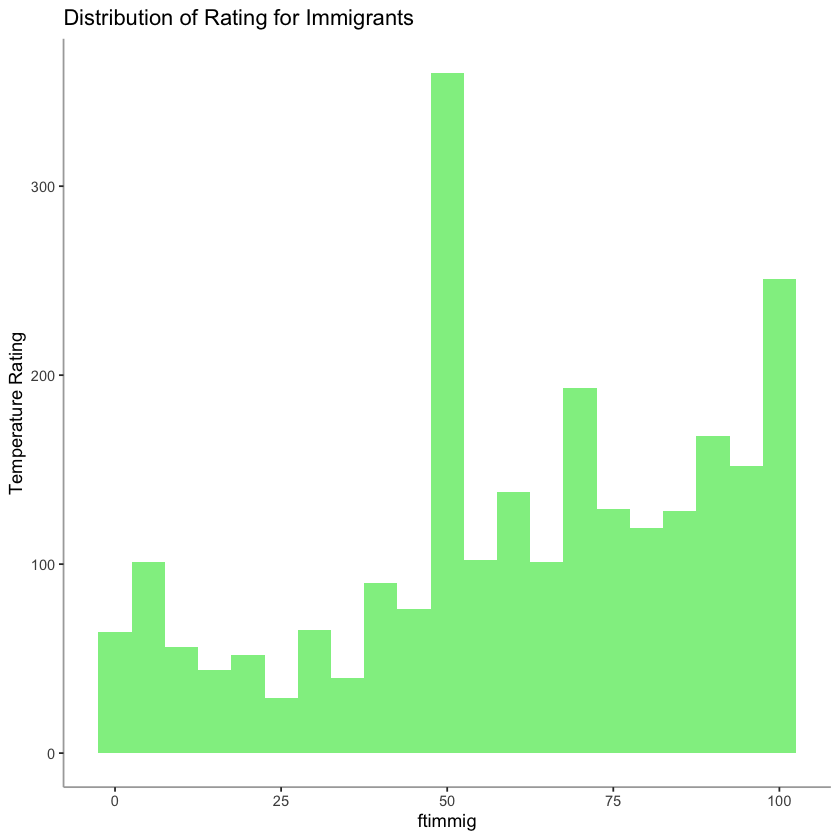

In [97]:
# ftimmig: temperature rating for immigrants ("How would you rate immigrants?")

ggplot(A[A$ftimmig > 0,], 
       aes(x=ftimmig)) + 
    geom_histogram(binwidth=5, fill="lightgreen") +
ggtitle("Distribution of Rating for Immigrants") +
ylab("Temperature Rating")+
theme(axis.line = element_line(colour = "darkgray"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) 

In [98]:
# Some people have proposed that the U.S. Constitution should be changed so that
# the children of unauthorized immigrants do not automatically get citizenship if they
# are born in this country.
# Do you favor, oppose, or neither favor nor oppose this proposal?

table(A$birthright)



 -7   1   2   3   4   5   6   7 
  1 608 190 193 450 124 183 751 

In [99]:
# Create a fctor for birthright 

A$birthright_factor = 
    factor(A$birthright, 
           levels = c(1, 2, 3, 4, 5, 6, 7, -1),
           labels = c("Favor a great deal",
                      "Favor moderately", 
                      "Favor a little", 
                      "Neither favor nor oppose",
                      "Oppose a little",
                      "Oppose moderately",
                      "Oppose a great deal",
                      "(N/A)"
                     ),
           ordered=TRUE)

In [100]:
table(A$birthright_factor)



      Favor a great deal         Favor moderately           Favor a little 
                     608                      190                      193 
Neither favor nor oppose          Oppose a little        Oppose moderately 
                     450                      124                      183 
     Oppose a great deal                    (N/A) 
                     751                        0 

In [101]:
# [wall] Do you favor, oppose, or neither favor nor oppose building a wall on the U.S. border with Mexico?

table(A$wall)


  1   2   3   4   5   6   7 
704 155 118 318 114 162 929 

In [102]:
# Create a factor for building the wall 

A$wall_factor = 
    factor(A$wall, 
           levels = c(1, 2, 3, 4, 5, 6, 7),
           labels = c("Favor a great deal",
                      "Favor moderately", 
                      "Favor a little", 
                      "Neither favor nor oppose",
                      "Oppose a little",
                      "Oppose moderately",
                      "Oppose a great deal"
                     ),
           ordered=TRUE)

In [103]:
table(A$wall_factor)


      Favor a great deal         Favor moderately           Favor a little 
                     704                      155                      118 
Neither favor nor oppose          Oppose a little        Oppose moderately 
                     318                      114                      162 
     Oppose a great deal 
                     929 

In [104]:
# [diversity] On balance, do you think having an increasing number of people of many different races,
# ethnic groups and nationalities in the United States makes this country a better place to live,
# a worse place to live, or does it make no difference?

table(A$diversity)


  1   2   3   4   5   6   7 
685 419 301 654 190 119 132 

In [105]:
# Create a factor for diversity 

A$diversity_factor = 
    factor(A$diversity, 
           levels = c(1, 2, 3, 4, 5, 6, 7),
           labels = c("A lot better",
                      "Moderately better", 
                      "A little better", 
                      "No difference",
                      "A little worse",
                      "Moderately worse",
                      "A lot worse"
                     ),
           ordered=TRUE)

In [106]:
table(A$diversity_factor)


     A lot better Moderately better   A little better     No difference 
              685               419               301               654 
   A little worse  Moderately worse       A lot worse 
              190               119               132 

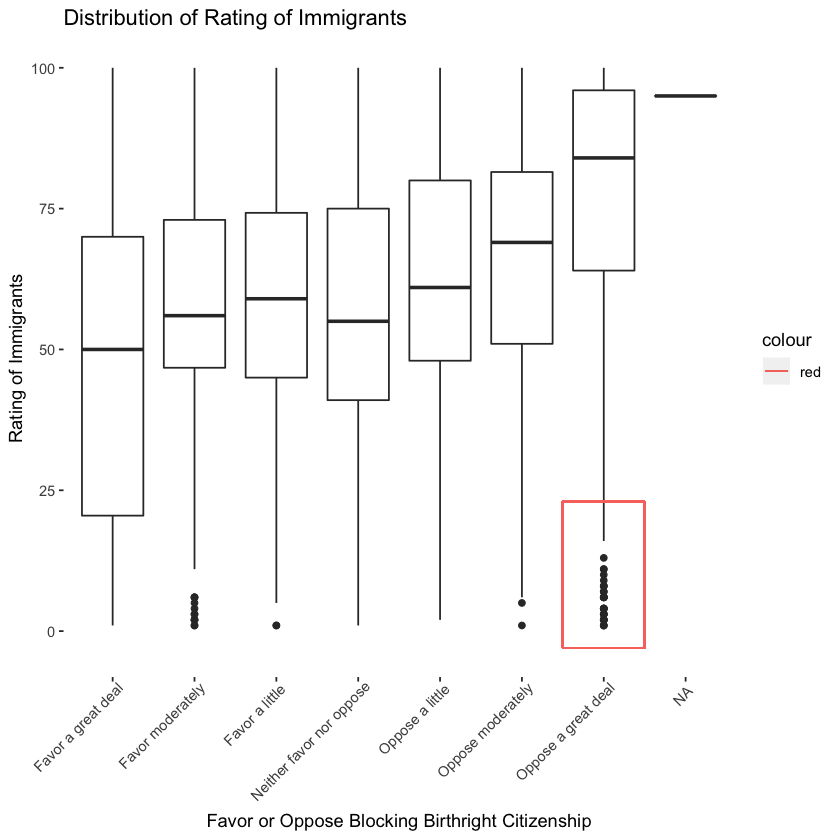

In [107]:
left=6.5
right=7.5
bottom=-3
top=23

ggplot(A[A$ftimmig > 0,], 
       aes(x=birthright_factor
           , y=ftimmig)) + 
    geom_boxplot() +
ggtitle("Distribution of Rating of Immigrants") +
xlab("Favor or Oppose Blocking Birthright Citizenship") + 
ylab("Rating of Immigrants")+ 
theme(axis.text.x = element_text(angle = 45, hjust=0.95),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) +
# Draw a red box around weird outliers 
geom_segment(aes(x = left, y = bottom, xend = right, yend = bottom, color="red" )) +
geom_segment(aes(x = left, y = bottom, xend = left, yend = top, color="red" )) +
geom_segment(aes(x = right, y = bottom, xend = right, yend = top, color="red" )) +
geom_segment(aes(x = left, y = top, xend = right, yend = top, color="red" )) 

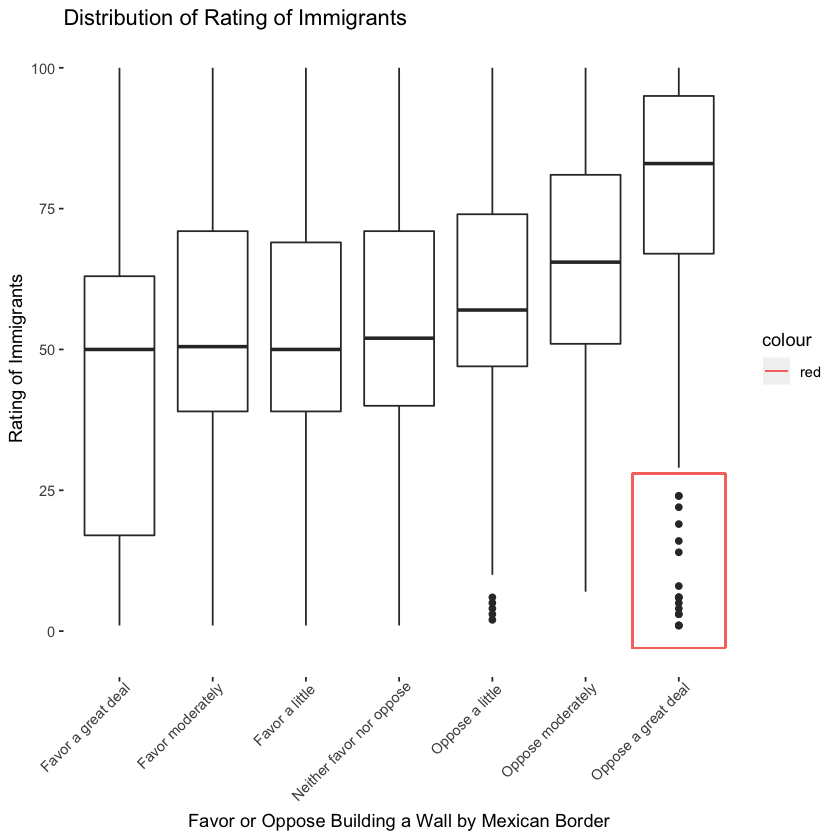

In [108]:
# The rating for immigrant is generally higher for those who oppose changing the constitution
# and generally lower for those who favor changing the constitution to stop birthright.
# See red box on the chart above for an interesting group of responses. 
# The chart above shows that some people who OPPOSE blocking of birthright
# actually rate immigrants really low. I wonder if these folks
# misunderstood the question as opposing birthright itself, rather than
# the change of law that would no longer grant birthright citizenship. 

# Now draw a box plot of ftimmig over building wall 

left=6.5
right=7.5
bottom=-3
top=28

ggplot(A[A$ftimmig > 0,], 
       aes(x=wall_factor
           , y=ftimmig)) + 
    geom_boxplot() +
ggtitle("Distribution of Rating of Immigrants") +
xlab("Favor or Oppose Building a Wall by Mexican Border") + 
ylab("Rating of Immigrants")+
theme(axis.text.x = element_text(angle = 45, hjust=0.95),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) +
# Draw a red box around weird outliers 
geom_segment(aes(x = left, y = bottom, xend = right, yend = bottom, color="red" )) +
geom_segment(aes(x = left, y = bottom, xend = left, yend = top, color="red" )) +
geom_segment(aes(x = right, y = bottom, xend = right, yend = top, color="red" )) +
geom_segment(aes(x = left, y = top, xend = right, yend = top, color="red" )) 

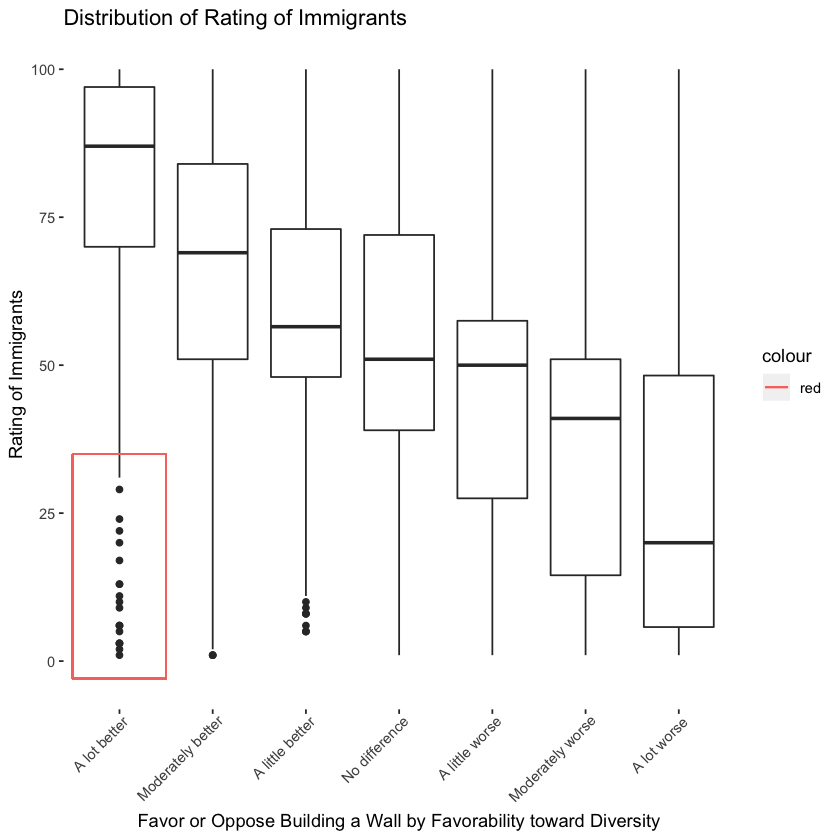

In [109]:
# The rating for immigrant is generally higher for those who oppose the wall,
# and generally lower for those who favor building the wall. 
# See red box on the chart above. 
# Some people who OPPOSE building a wall also happen to rate immigrants really low.
# They possibly misunderstood the questions as well.

# Now draw a box plot of ftimmig over building wall 

left=0.5
right=1.5
bottom=-3
top=35

ggplot(A[A$ftimmig > 0,], 
       aes(x=diversity_factor
           , y=ftimmig)) + 
    geom_boxplot() +
ggtitle("Distribution of Rating of Immigrants") +
xlab("Favor or Oppose Building a Wall by Favorability toward Diversity") + 
ylab("Rating of Immigrants")+
theme(axis.text.x = element_text(angle = 45, hjust=0.95),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) +
# Draw a red box around weird outliers 
geom_segment(aes(x = left, y = bottom, xend = right, yend = bottom, color="red" )) +
geom_segment(aes(x = left, y = bottom, xend = left, yend = top, color="red" )) +
geom_segment(aes(x = right, y = bottom, xend = right, yend = top, color="red" )) +
geom_segment(aes(x = left, y = top, xend = right, yend = top, color="red" )) 

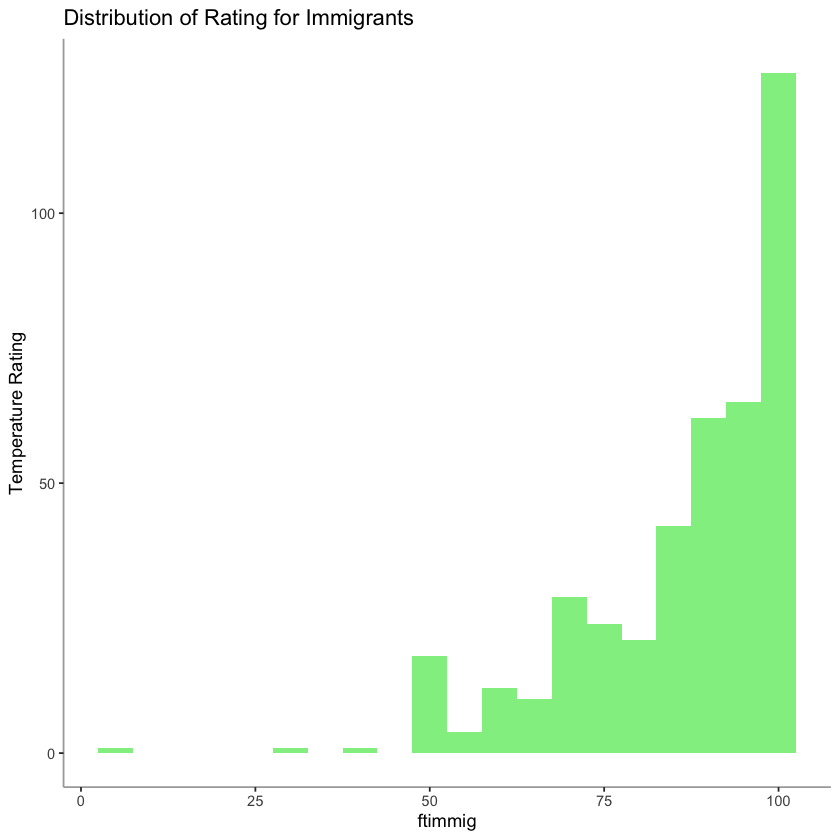

In [110]:
# Similar pattern here. Those who favor diversity tend to rate immigrants higher.
# However, there are still groups of people who, despite favoring diversity,
# rate immigrants lower. I wonder if this is the same group of people who
# both opposed changing the constitution and opposed the wall, yet rated immigrants lower.

immi_outliers <- 
    A[A$diversity_factor=="A lot better" &
      A$wall_factor == "Oppose a great deal" &
      A$birthright_factor == "Oppose a great deal",
     c("diversity_factor", "wall_factor", "birthright_factor", "ftimmig")]


# ftimmig: temperature rating for immigrants ("How would you rate immigrants?")

ggplot(immi_outliers, 
       aes(x=ftimmig)) + 
    geom_histogram(binwidth=5, fill="lightgreen") +
ggtitle("Distribution of Rating for Immigrants") +
ylab("Temperature Rating")+
theme(axis.line = element_line(colour = "darkgray"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) 

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

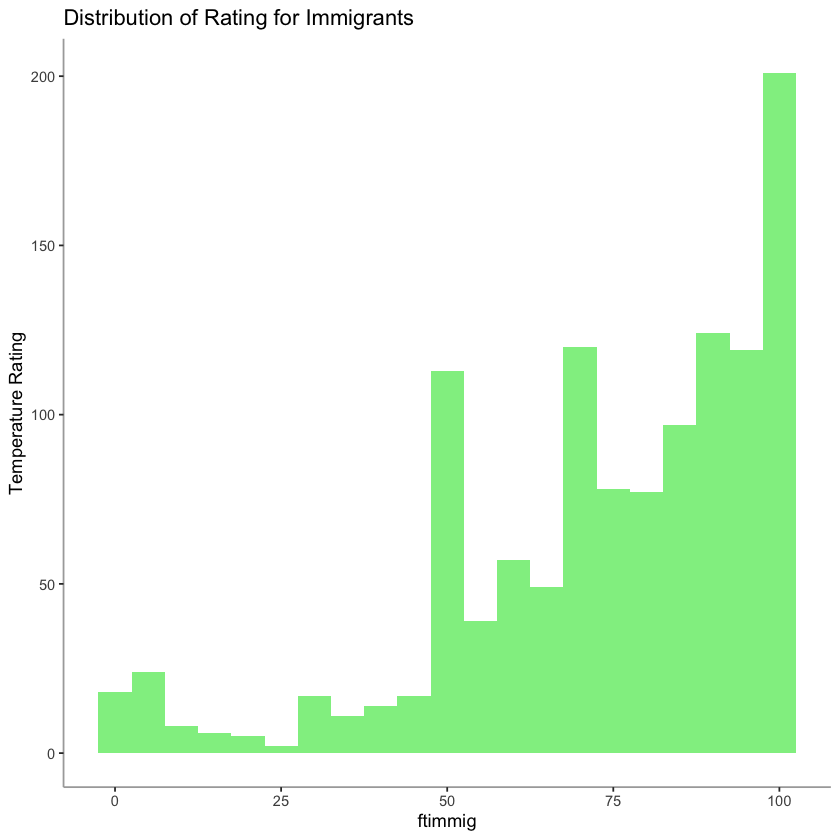

In [111]:
# Change it to OR instead of AND 
immi_outliers2 <- 
    A[A$diversity_factor=="A lot better" |
      A$wall_factor == "Oppose a great deal" |
      A$birthright_factor == "Oppose a great deal",
     c("diversity_factor", "wall_factor", "birthright_factor", "ftimmig")]


# ftimmig: temperature rating for immigrants ("How would you rate immigrants?")

ggplot(immi_outliers2, 
       aes(x=ftimmig)) + 
    geom_histogram(binwidth=5, fill="lightgreen") +
ggtitle("Distribution of Rating for Immigrants") +
ylab("Temperature Rating")+
theme(axis.line = element_line(colour = "darkgray"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) 

Despite having outliers, the people who respond favorably toward immigrants to issue-specific questions did not seem to have misunderstood the temperature question. It's possible that they generally feel coldly toward immigrants, but oppose some of these specific issues for other reasons, such as the national budget.

After much data exploration, we find the general temperature rating of immigrants to be a functional indicator of sentiments toward immigrants. 

In [112]:
# Examine rural resentment

summary(A$rural1)
table(A$rural1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.0000 -1.0000  1.0000  0.8912  3.0000  5.0000 


  -1    1    2    3    4    5 
1234  206  354  404  174  128 

In [113]:
A$rural1_factor = 
    factor(A$rural1, 
           levels = c(1, 2, 3, 4, 5),
           labels = c("Not at all",
                      "A little", 
                      "A moderate amount",
                      "A lot",
                      "A great deal"
                     ),
           ordered=TRUE)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

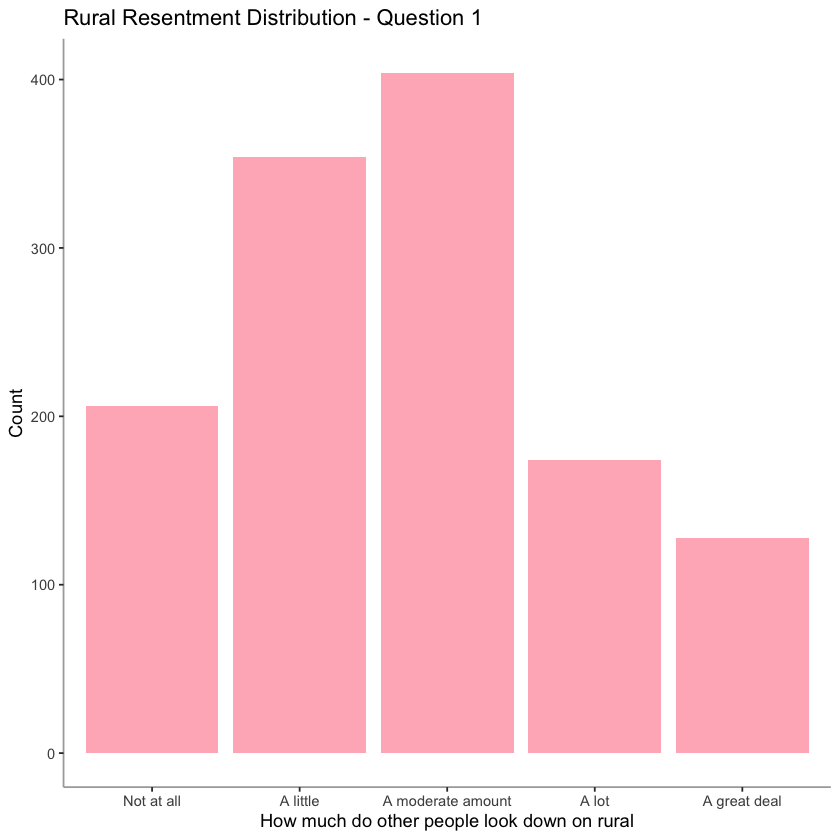

In [114]:
ggplot(A[A$rural1>0,], 
       aes(x=rural1_factor)) + 
    geom_histogram(fill="lightpink", stat="count") +
ggtitle("Rural Resentment Distribution - Question 1") +
ylab("Count")+
xlab("How much do other people look down on rural")+
theme(axis.line = element_line(colour = "darkgray"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) 

In [115]:
A$rural2_factor = 
    factor(A$rural2, 
           levels = c(1, 2, 3, 4, 5),
           labels = c("None",
                      "Few", 
                      "About half",
                      "A lot",
                      "All"
                     ),
           ordered=TRUE)

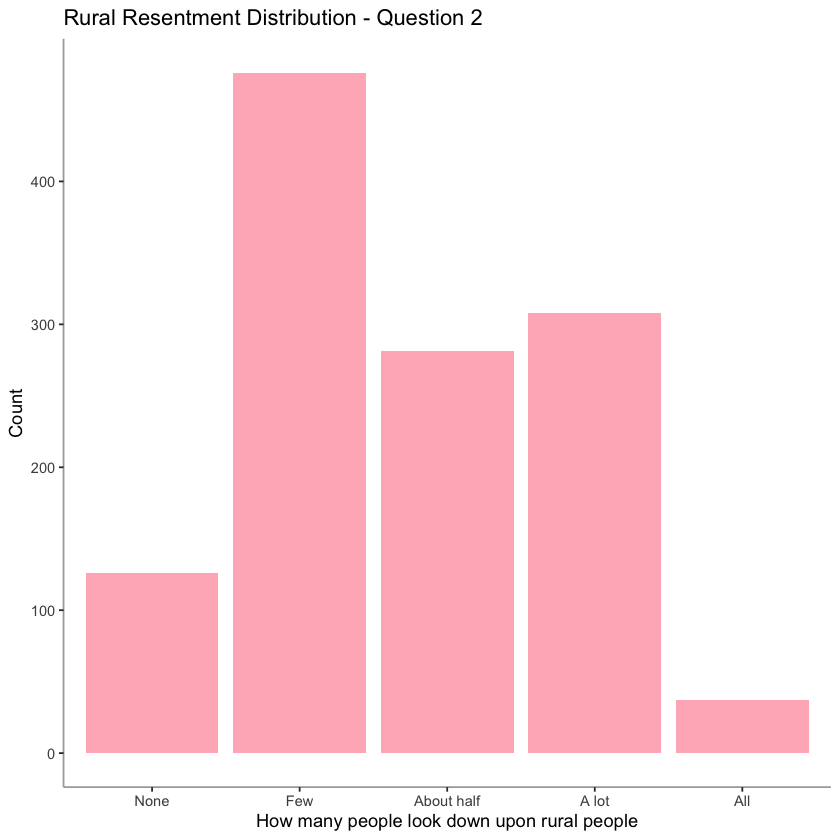

In [116]:
ggplot(A[A$rural2>0,], 
       aes(x=rural2_factor)) + 
    geom_bar(fill="lightpink", stat="count") +
ggtitle("Rural Resentment Distribution - Question 2") +
ylab("Count")+
xlab("How many people look down upon rural people")+
theme(axis.line = element_line(colour = "darkgray"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) 

In [117]:
# Check that only rural1 or rural2 was presented to the respondent
# based on random assignment. 

table(A$rural1, A$rural2)

    
      -7  -1   1   2   3   4   5
  -1   6   0 126 476 281 308  37
  1    0 206   0   0   0   0   0
  2    0 354   0   0   0   0   0
  3    0 404   0   0   0   0   0
  4    0 174   0   0   0   0   0
  5    0 128   0   0   0   0   0

In [118]:
# Combine rural1 and rural2 into one variable. 
# Sentiment-wise, the responses approximately map to each other
# and can be used in combination to measure resentment

A$rural_combo <- A$rural2    # Take value of rural2 first
A$rural_combo[A$rural2 == -1] <- A$rural1[A$rural1 > 0]    # where rural2 is a legit skip, take value of rural1

In [119]:
summary(A$rural_combo)
table(A$rural_combo)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -7.000   2.000   3.000   2.703   4.000   5.000 


 -7   1   2   3   4   5 
  6 332 830 685 482 165 

In [120]:
A$rural_combo_factor = 
    factor(A$rural_combo, 
           levels = c(1, 2, 3, 4, 5),
           labels = c("None",
                      "Little", 
                      "Moderate",
                      "A lot",
                      "A Great Deal"
                     ),
           ordered=TRUE)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

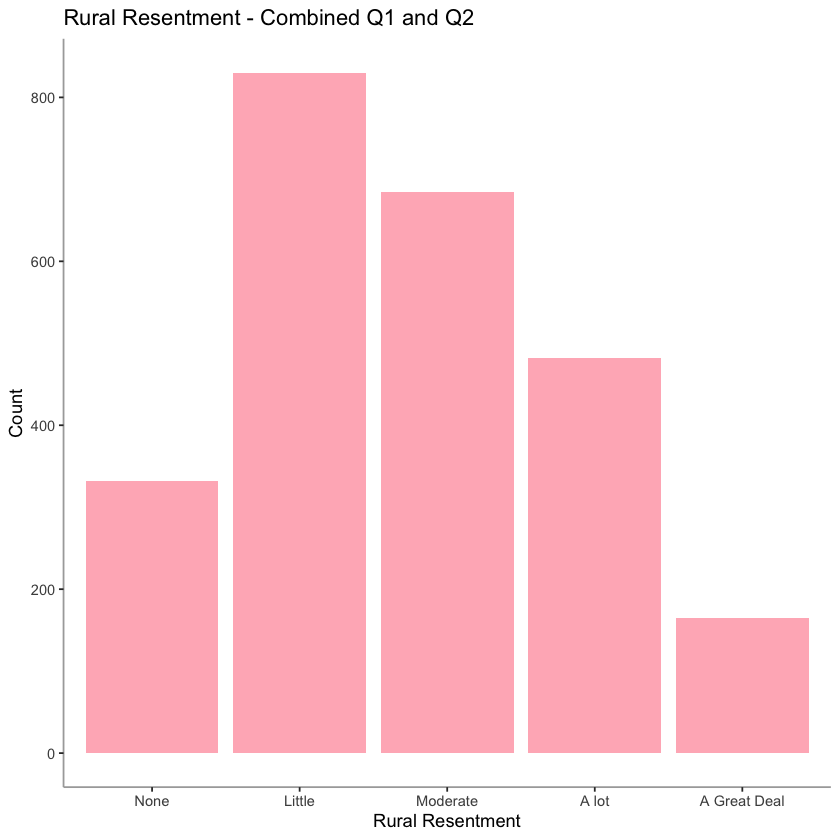

In [121]:
ggplot(A[A$rural_combo > 0,], 
       aes(x=rural_combo_factor)) + 
    geom_histogram(fill="lightpink", stat="count") +
ggtitle("Rural Resentment - Combined Q1 and Q2") +
ylab("Count")+
xlab("Rural Resentment")+
theme(axis.line = element_line(colour = "darkgray"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank()) 

In [122]:
# For the six people whose resentment data is not available,
# we will drop the data from analysis. We could impute the mean
# but both mean and median imply a moderate level of resentment
# and since 6 out of 2,500 is a very small number,
# we do not think eliminating these observations will pose
# a significant bias to our analysis. 

A$rural3_factor = 
    factor(A$rural3, 
           levels = c(1, 2, 3, 4, 5, 6, 7),
           labels = c("A great deal more",
                      "Moderately more", 
                      "A little more",
                      "The same",
                      "A little less",
                      "Moderately less", 
                      "A great deal less"
                     ),
           ordered=TRUE)


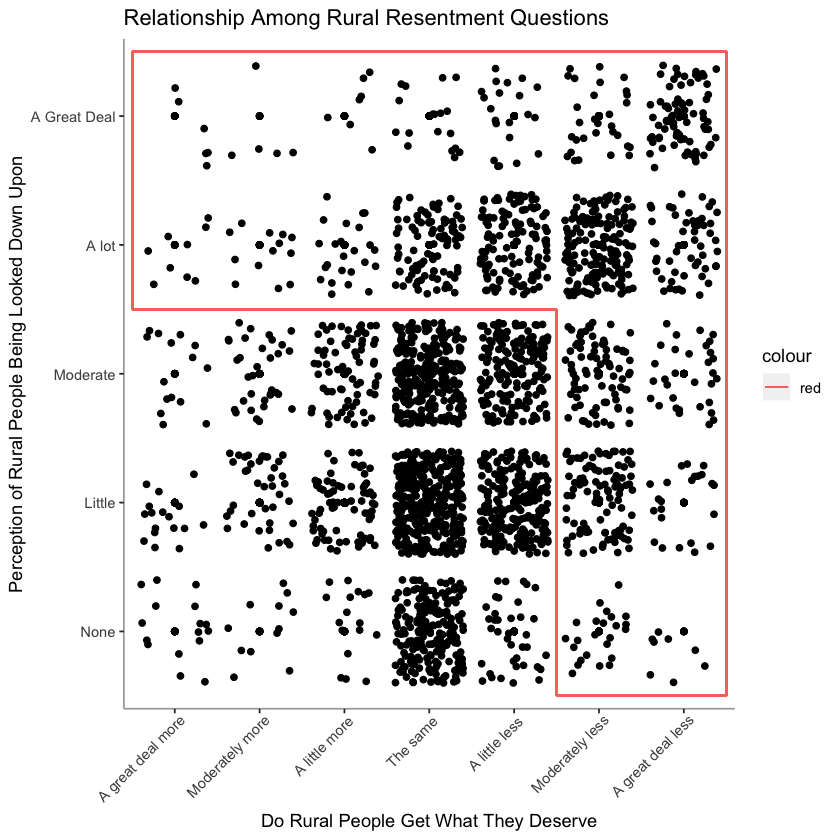

In [123]:
left    = 0.5
hmiddle = 5.5
right   = 7.5
top     = 5.5
vmiddle = 3.5
bottom  = 0.5

ggplot(A[A$rural_combo > 0 & A$rural3 > 0,], 
       aes(x=rural3_factor
           , y=rural_combo_factor)) + 
geom_point() +
geom_jitter() +
ggtitle("Relationship Among Rural Resentment Questions") +
xlab("Do Rural People Get What They Deserve") + 
ylab("Perception of Rural People Being Looked Down Upon")+
theme(axis.line = element_line(colour = "darkgray"),
      axis.text.x = element_text(angle = 45, hjust=0.95),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.border = element_blank(),
      panel.background = element_blank()) +
geom_segment(aes(x = left, y = top   , xend = right, yend = top   , color="red" )) +
geom_segment(aes(x = right, y = top  , xend = right, yend = bottom, color="red" )) +
geom_segment(aes(x = right, y = bottom, xend = hmiddle, yend = bottom, color="red" )) +
geom_segment(aes(x = hmiddle, y = bottom, xend = hmiddle, yend = vmiddle, color="red" )) +
geom_segment(aes(x = hmiddle, y = vmiddle, xend = left, yend = vmiddle, color="red" )) +
geom_segment(aes(x = left, y = vmiddle, xend = left, yend = top, color="red" )) 

In [124]:
# We define rural resentment as those who fall in the red box above.
# Feeling like rural people get less than what they deserve (regardless of magnitude)
# OR feeling like rural people are looked down upon. 

unique(A$rural3_factor[A$rural3 > 5]) # changed here (Nobu)
unique(A$rural_combo_factor[A$rural_combo > 3])

[1] Moderately less   A great deal less
7 Levels: A great deal more < Moderately more < A little more < ... < A great deal less

[1] A lot        A Great Deal
Levels: None < Little < Moderate < A lot < A Great Deal

In [125]:
# Create a new indicator variable with a value 0
A$rural_resent <- 0

# Only replace value with 1 if it meets one of the two conditions
A$rural_resent[A$rural3 > 5 | A$rural_combo > 3] <- 1 # changed here (Nobu)

In [126]:
# Create a fctor for rural resentment

A$rural_resent_factor = 
    factor(A$rural_resent, 
           levels = c(0, 1),
           labels = c("No rural resentment",
                      "Rural resentment"
                     ),
           ordered=TRUE)

In [127]:
table(A$rural_resent_factor)


No rural resentment    Rural resentment 
               1581                 919 

In [128]:
# Let's see what the age group looks like. According to some articles we read,
# we want to know if people of certain age groups show more rural resentment.

table(A$rural_resent_factor, round((2018-A$birthyr), -1) ) 

                     
                       20  30  40  50  60  70  80  90
  No rural resentment 163 251 260 251 383 173  87  13
  Rural resentment     81 126 125 164 234 120  63   6

In [129]:
# select the participants who voted for the 2018 election

new_master = subset(A, ((turnout18 < 4) | #
                    (turnout18 == 5 & turnout18ns == 1))
                    & (reg %in% c(1, 2)) & 

                    !(house18t != 1 & senate18t != 1 & gov18t != 1))

In [130]:
# calculate the age of participants
birth_date <- as.Date(paste(new_master$birthyr, "07", "01"),format="%Y %m %d")


wk_age <- c() 
for (i in seq(1:length(birth_date))) {

    wk_age[i] <- length(seq(as.Date(paste(new_master$birthyr[i], "07", "01"),format="%Y %m %d"),
                            as.Date("2018/11/06"),by="year"))-1

}
# add new column "age" to dataframe
new_master$age <- wk_age

From here, we check if we can see any difference between Democratic voters and Republican voters, to determine if there are any other factors that may offer insight into the relationship between immigrant rating and rural resentment.

In [131]:
demo_voters <- subset(new_master, !(house18p %in% c(2,3))
                     & !(senate18p %in% c(2,3,4))
                     & !(gov18p %in% c(2,3)))
rep_voters <- subset(new_master, !(house18p %in% c(1,3))
                     & !(senate18p %in% c(1,3,4))
                     & !(gov18p %in% c(1,3)))

In [132]:
demo_prime <- subset(demo_voters, age > 24 & age < 55)


In [133]:
rep_prime <- subset(rep_voters, age > 24 & age < 55)

In [134]:
summary(demo_prime$rural_resent)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3309  1.0000  1.0000 

In [135]:
summary(demo_prime$rural_resent_factor)

No rural resentment    Rural resentment 
                277                 137

In [136]:
summary(rep_prime$rural_resent_factor)

No rural resentment    Rural resentment 
                126                 103

In [137]:
summary(demo_voters$rural_resent_factor)

No rural resentment    Rural resentment 
                655                 284

In [138]:
summary(rep_voters$rural_resent_factor)

No rural resentment    Rural resentment 
                344                 328

The histograms of thermometer ratings between the rural resentment and no resentment groups look similar. Both groups show a spoke at 50, which indicates neutral sentiments toward immigrants, and both groups show slightly higher levels of positive rating (over 50) than negative. 

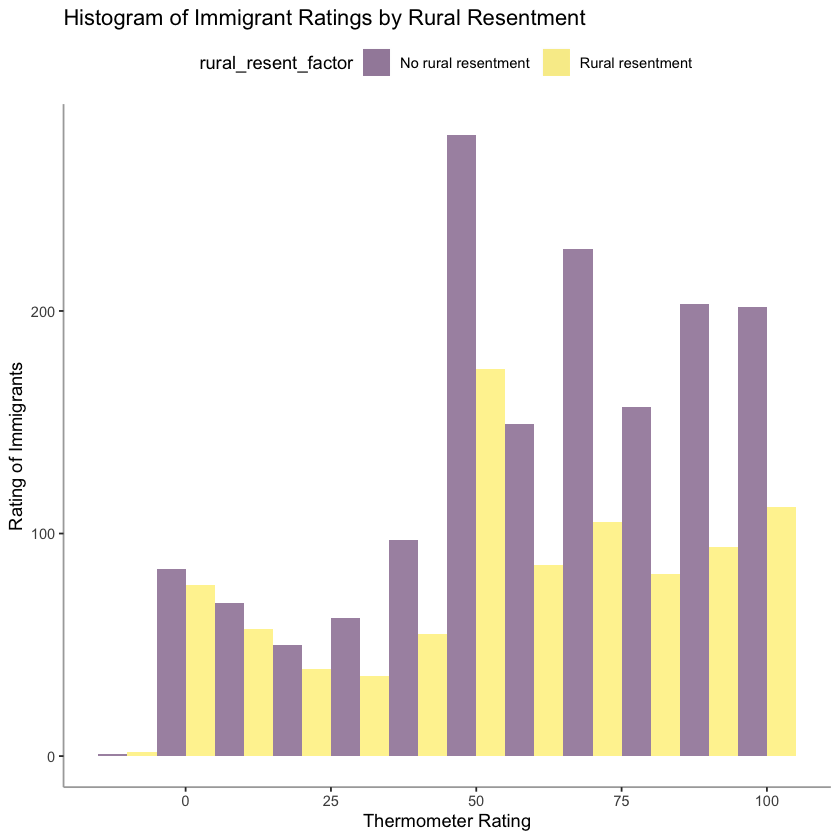

In [165]:

p<- ggplot(data=A, 
       aes(x=ftimmig,
           fill=rural_resent_factor
          )
      ) + 
geom_histogram(alpha=0.5,
             #fill="purple",
             position="dodge",
             binwidth=10)+
theme(legend.position="top") +
ggtitle("Histogram of Immigrant Ratings by Rural Resentment") +
xlab("Thermometer Rating") + 
ylab("Rating of Immigrants")+
theme(axis.line = element_line(colour = "darkgray"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) 


p

Box plot shows that the rural resentment group tends to have lower ratings for immigrants. 

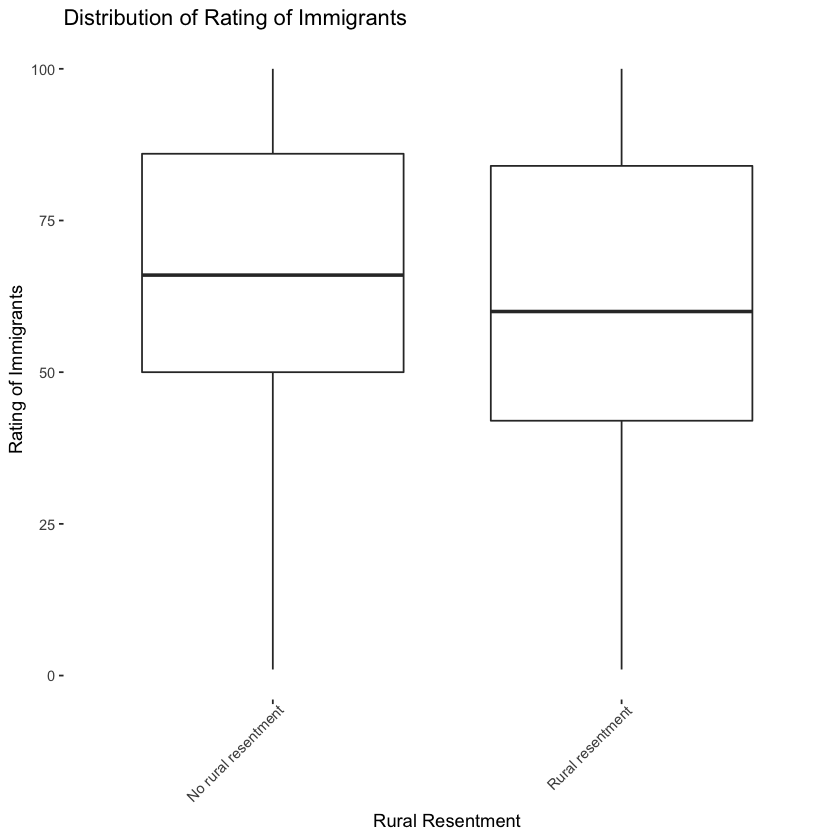

In [166]:
ggplot(A[A$ftimmig > 0,], 
       aes(x=rural_resent_factor
           , y=ftimmig)) + 
    geom_boxplot() +
ggtitle("Distribution of Rating of Immigrants") +
xlab("Rural Resentment") + 
ylab("Rating of Immigrants")+ 
theme(axis.text.x = element_text(angle = 45, hjust=0.95),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) 

### C. Hypothesis Testing

#### (1) Statistical significance


In [139]:
t.test(A$ftimmig~A$rural_resent)


	Welch Two Sample t-test

data:  A$ftimmig by A$rural_resent
t = 3.9463, df = 1802.8, p-value = 8.24e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.434479 7.245093
sample estimates:
mean in group 0 mean in group 1 
       62.02151        57.18172 



Statistical Significance: There was a significant difference in average immigrant rating between those with and without rural resentment.

#### (2) Practical significance 



In [140]:
mean(A$ftimmig[A$rural_resent==1])-mean(A$ftimmig[A$rural_resent==0])

[1] -4.839786

Those with rural resentment rated immigrants 4.84 points less than those without rural resentment, on average, which is not hugely practically significant. 5 points on a 100-point scale is not enough to really shift a positive sentiment to negative sentiment.

### D. Conclusion


While rural resentment associates with a lower rating for immigrants, although the difference is negligible. 
From this study alone, we cannot conclude that rural resentment leads to xenophobic attitudes. In turn, we cannot determine that rural resentment drove voters to Trump for his anti-immigrant messages either. In order to draw such conclusions, further study is warranted.

There are likely other factors that may be associated with immigrant ratings. Therefore, future analyses could incorporate multiple regression to account for additional variables. Also, future analyses could define rural resentment more strictly, to only those who picked the most extreme answer to the questions on whether rural people are looked down upon or deserve much less than what they get. If the respondents on this extreme end do not show a statistically and practically significant result, then it makes a stronger case that rural resentment does not necessarily lead to immigration resentment.